In [10]:
import pandas as pd
import numpy as np
#visuals
import matplotlib.pyplot as plt
import seaborn as sns
#db
import psycopg2 as psy
#for decoding the IP's location
import geoip2.database
from geopy.geocoders import Nominatim


In [64]:
Feb5 = pd.read_csv('/Users/sa12/Documents/Repositories/The-CyberChase/CybercrimeData/2023-02-05.csv')
Feb6 = pd.read_csv('/Users/sa12/Documents/Repositories/The-CyberChase/CybercrimeData/2023-02-06.csv')

In [39]:
Feb5.describe()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1950.000000,1950.000000,1950.000000,1.950000e+03,1950.000000,1950.000000,1950.000000,1.950000e+03,1950.000000,1950.000000,...,1950.000000,1950.000000,1.950000e+03,1950.0,1.950000e+03,1.950000e+03,1.950000e+03,1.950000e+03,1.950000e+03,1.950000e+03
mean,33772.874872,982.644103,14.929744,5.095167e+06,222.395385,25.586154,1909.062564,3.428343e+04,105.253333,32.734359,...,219.676410,11.325128,6.695856e+02,0.0,6.695856e+02,6.695856e+02,1.673921e+15,2.430475e+12,1.675639e+15,1.672202e+15
std,18880.070091,5660.826587,4.300738,1.120996e+07,674.538735,1044.031339,5358.096049,1.488086e+06,271.245718,28.307521,...,672.400046,7.376132,2.391388e+04,0.0,2.391388e+04,2.391388e+04,3.791653e+13,5.362211e+13,6.244567e+08,7.583309e+13
min,22.000000,22.000000,6.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,8.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,8.378195e+14,0.000000e+00,1.675638e+15,6.007164e+06
25%,17480.000000,123.000000,17.000000,4.070000e+02,1.000000,1.000000,48.000000,4.800000e+01,31.000000,8.000000,...,0.000000,8.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.675639e+15,0.000000e+00,1.675639e+15,1.675639e+15
50%,35824.000000,123.000000,17.000000,5.290000e+02,1.000000,1.000000,48.000000,4.800000e+01,48.000000,48.000000,...,0.000000,8.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.675639e+15,0.000000e+00,1.675639e+15,1.675639e+15
75%,49768.750000,123.000000,17.000000,8.991500e+04,3.000000,1.000000,48.000000,4.800000e+01,48.000000,48.000000,...,1.000000,8.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.675639e+15,0.000000e+00,1.675639e+15,1.675639e+15
max,65529.000000,60996.000000,17.000000,4.587067e+07,3178.000000,46105.000000,25424.000000,6.571264e+07,1440.000000,856.000000,...,3177.000000,32.000000,1.024901e+06,0.0,1.024901e+06,1.024901e+06,1.675642e+15,1.184857e+15,1.675642e+15,1.675642e+15


In [12]:
dogs = Feb5.select_dtypes(include=['int64', 'float64'])
cats = Feb5.select_dtypes(include=['string'])

In [41]:
#sns.pairplot(dogs)

In [ ]:
#sns.pairplot(Feb6)

Because this data is predictive and measures activity, a baseline of 0 can be assumed. Any activity will be measured starting from in increments above 0. Looking through the dataset, it is apparant that some columns are filled with mostly 0's. 

<Axes: xlabel='Value', ylabel='Feature'>

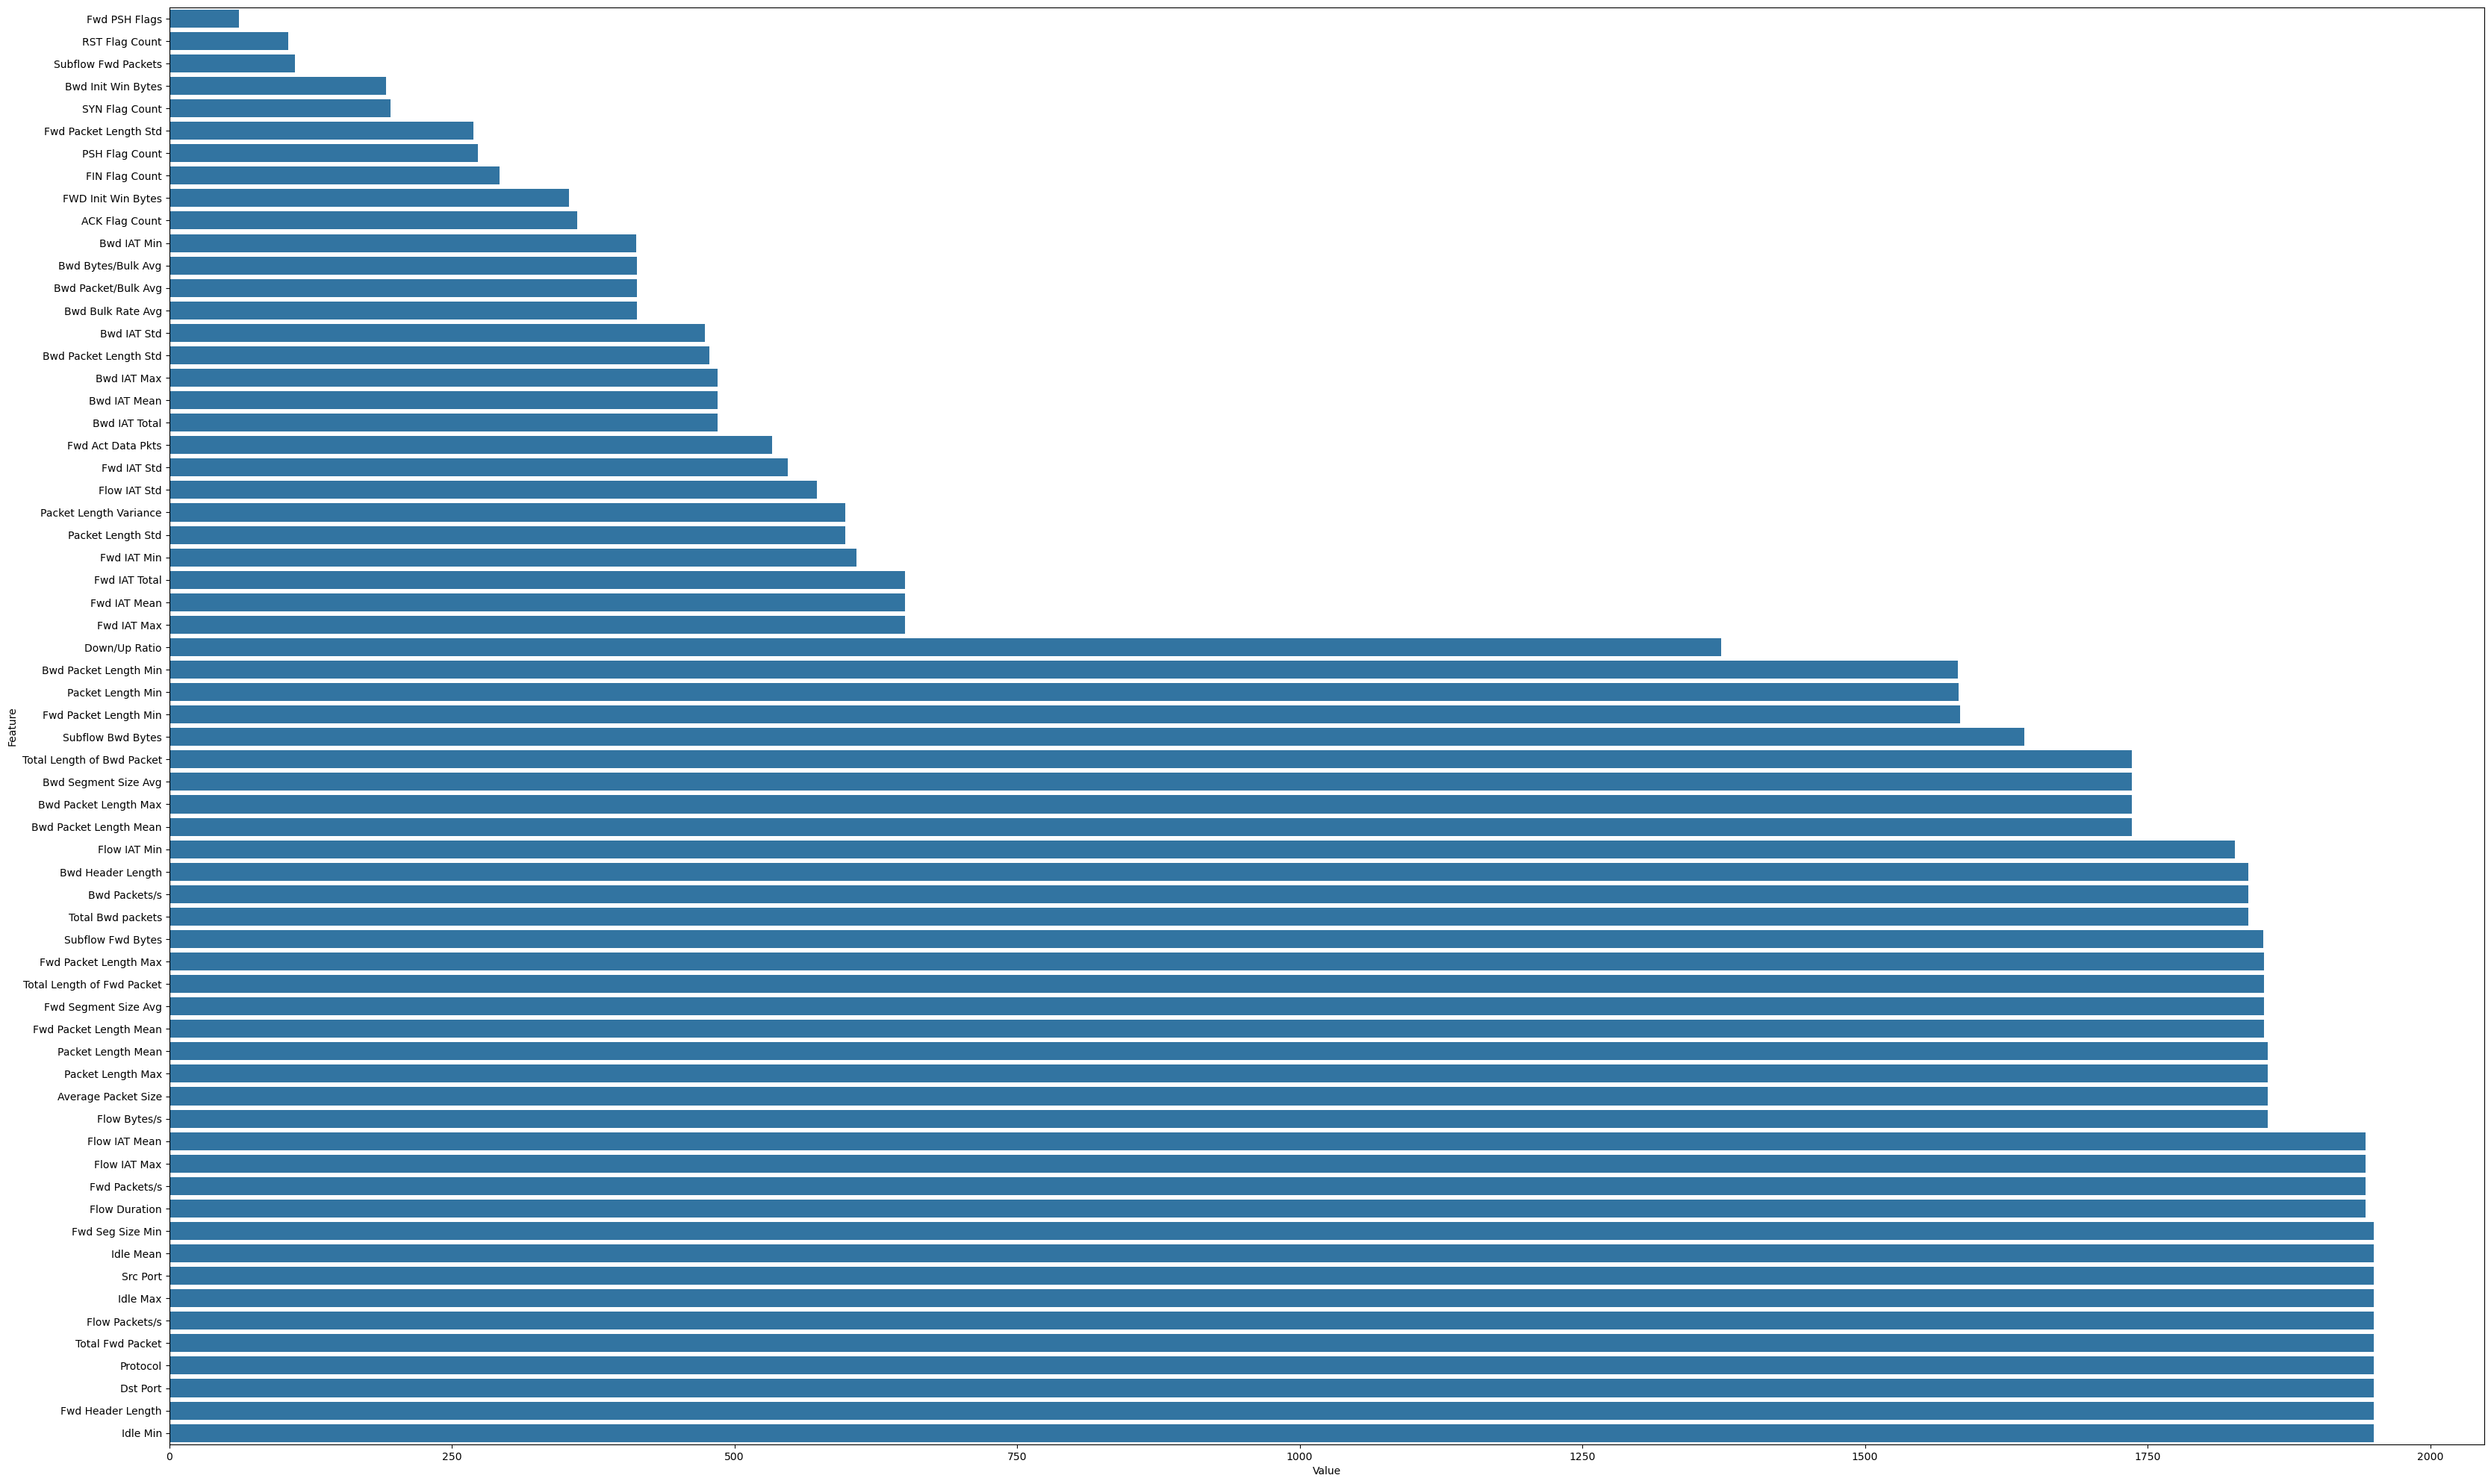

In [65]:
greater_than_zero_counts = {}
total_rows = len(Feb5)
for column in Feb5.columns:
    # Check if the column is numeric to avoid errors
    if pd.api.types.is_numeric_dtype(Feb5[column]):
        count = (Feb5[column] > 0).sum()
        greater_than_zero_counts[column] = count
greater_than_zero_counts = pd.DataFrame(greater_than_zero_counts.items(), columns=['Feature', 'Value'])
zero_counts = greater_than_zero_counts[greater_than_zero_counts['Value'] < total_rows*.01]
greater_than_zero_counts = greater_than_zero_counts[greater_than_zero_counts['Value'] > total_rows*.01].sort_values(by='Value')
plt.figure(figsize=(40,25))
sns.barplot(greater_than_zero_counts, y='Feature', x='Value')

In [66]:
zero_cols = zero_counts['Feature'].to_list()
Feb5 = Feb5.drop(columns=zero_cols)

The above code removes columns that were 99%+ 0's from the dataframe. They will provide us no analytical value.

# Methodology for cutting columns
### Create groupings of columns that contain data deriving from the same information:

Group 1 - flags - All columns pretaining to flags

Group 2 - Fwd - 

Group 3 - Bwd -

Group 4 - IAT -

Group 5 - Idle/Active

### Create correlation heatmaps and identify most representitive columns:
Find columns that have 85%+ correlation with other columns in the DF and choose to keep a single one that is MOST REPRESENTITIVE. This could mean that the column name is easiest to convoy or that the column has the best average correlation across multiple columns.

### Drop the represented columns, create a new heatmap, & repeat
We remove the columns that we have identifyed as being represented. This let's us remove noise and rerun our correlation matrix. If there is still columns with over 85+, repeat the process of identifying representitive columns and removing noise  until there is no more 85+ representation in the group. 

### Create list of all remaining columns.

<Axes: >

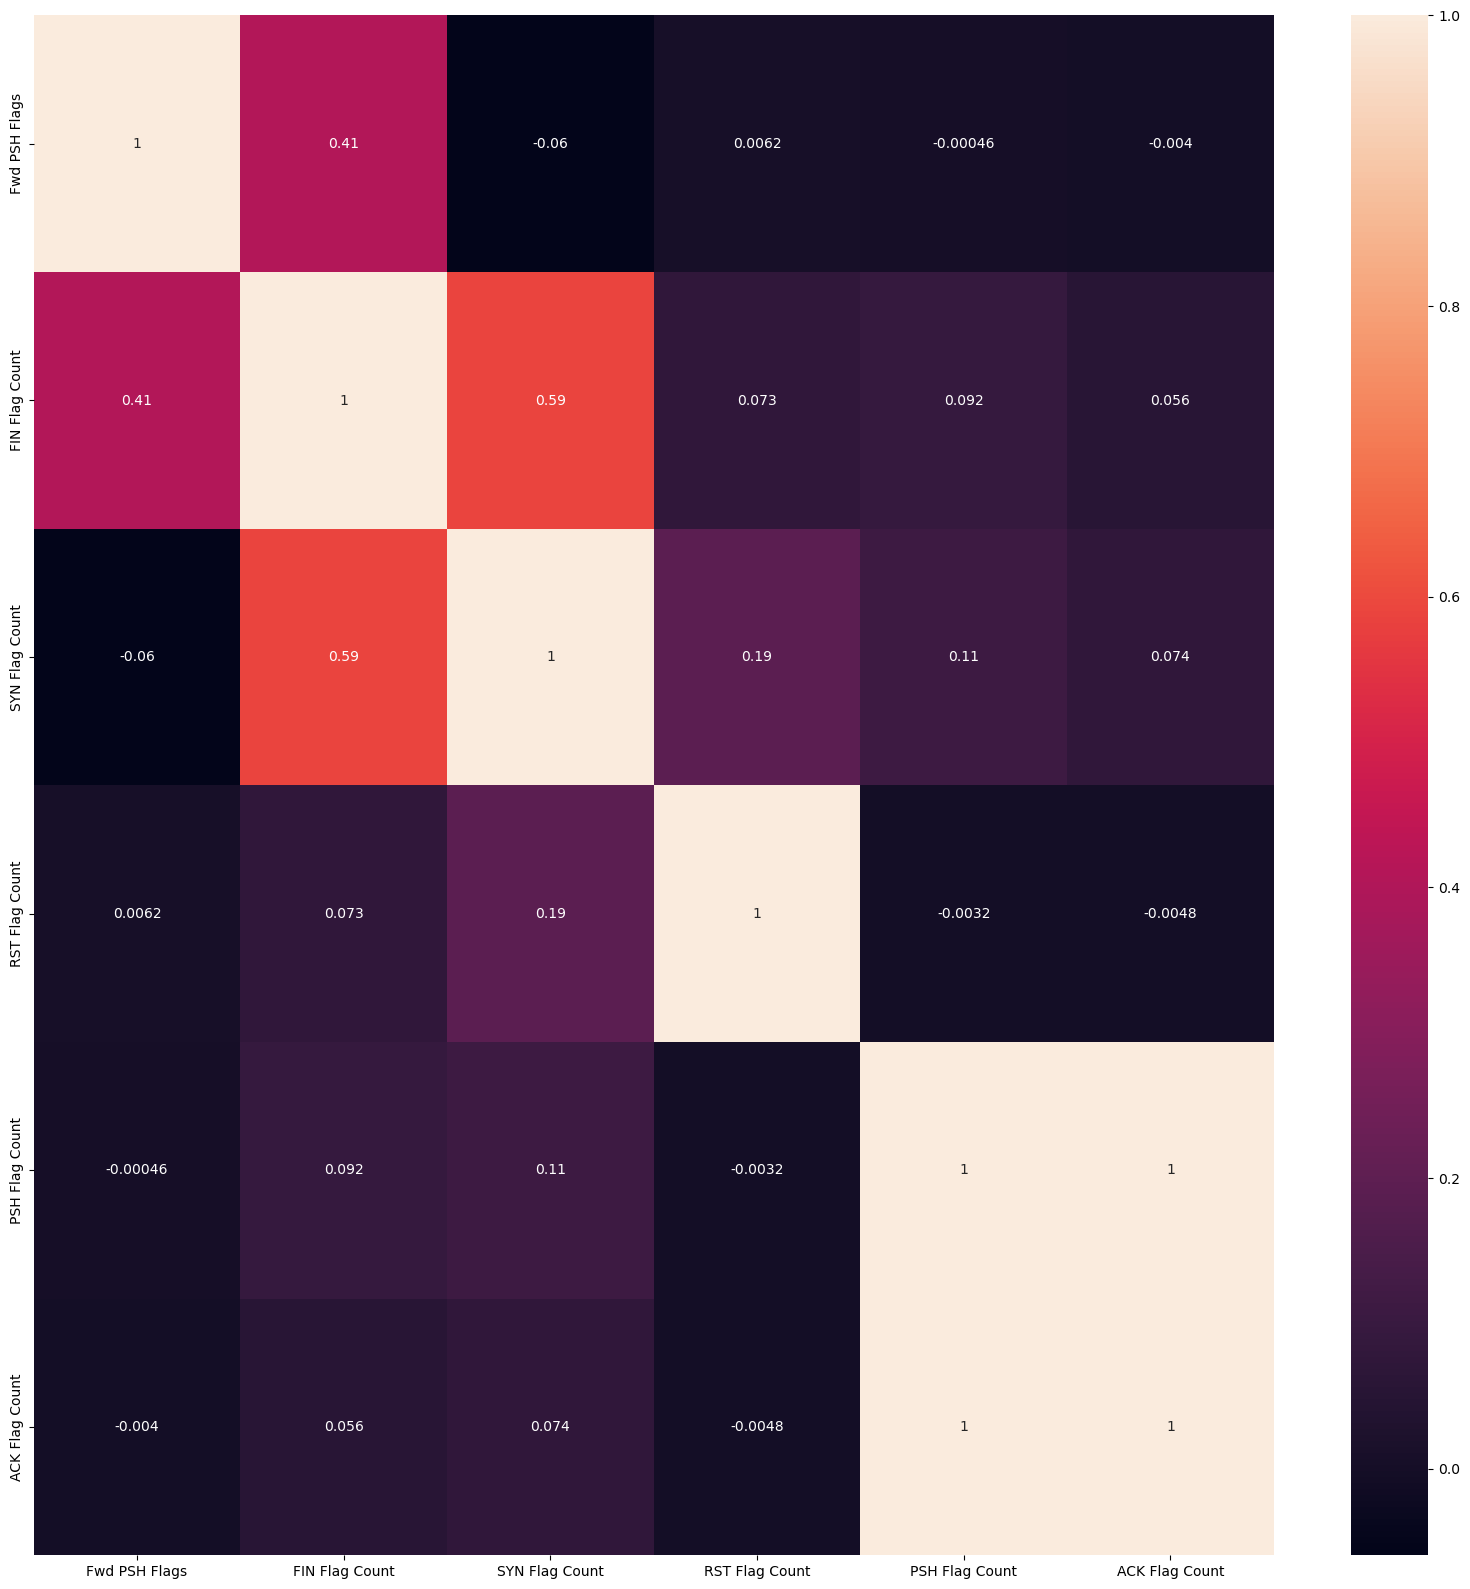

In [67]:
flags = Feb5[[ 'Fwd PSH Flags',
              'FIN Flag Count', 
              'SYN Flag Count', 
              'RST Flag Count', 
              'PSH Flag Count', 
              'ACK Flag Count']]
plt.figure(figsize=(20,20))
sns.heatmap(flags.corr(), annot=True)

There is perfect correlation across PSH Flag count and ACK Flag Count. PSH is the easier column to understand, so that is the one kept.

In [76]:
flags = flags.drop(columns=('ACK Flag Count'))
flag_cols = flags.columns
flag_cols = flag_cols.to_list()
flag_cols

['Fwd PSH Flags',
 'FIN Flag Count',
 'SYN Flag Count',
 'RST Flag Count',
 'PSH Flag Count']

<Axes: >

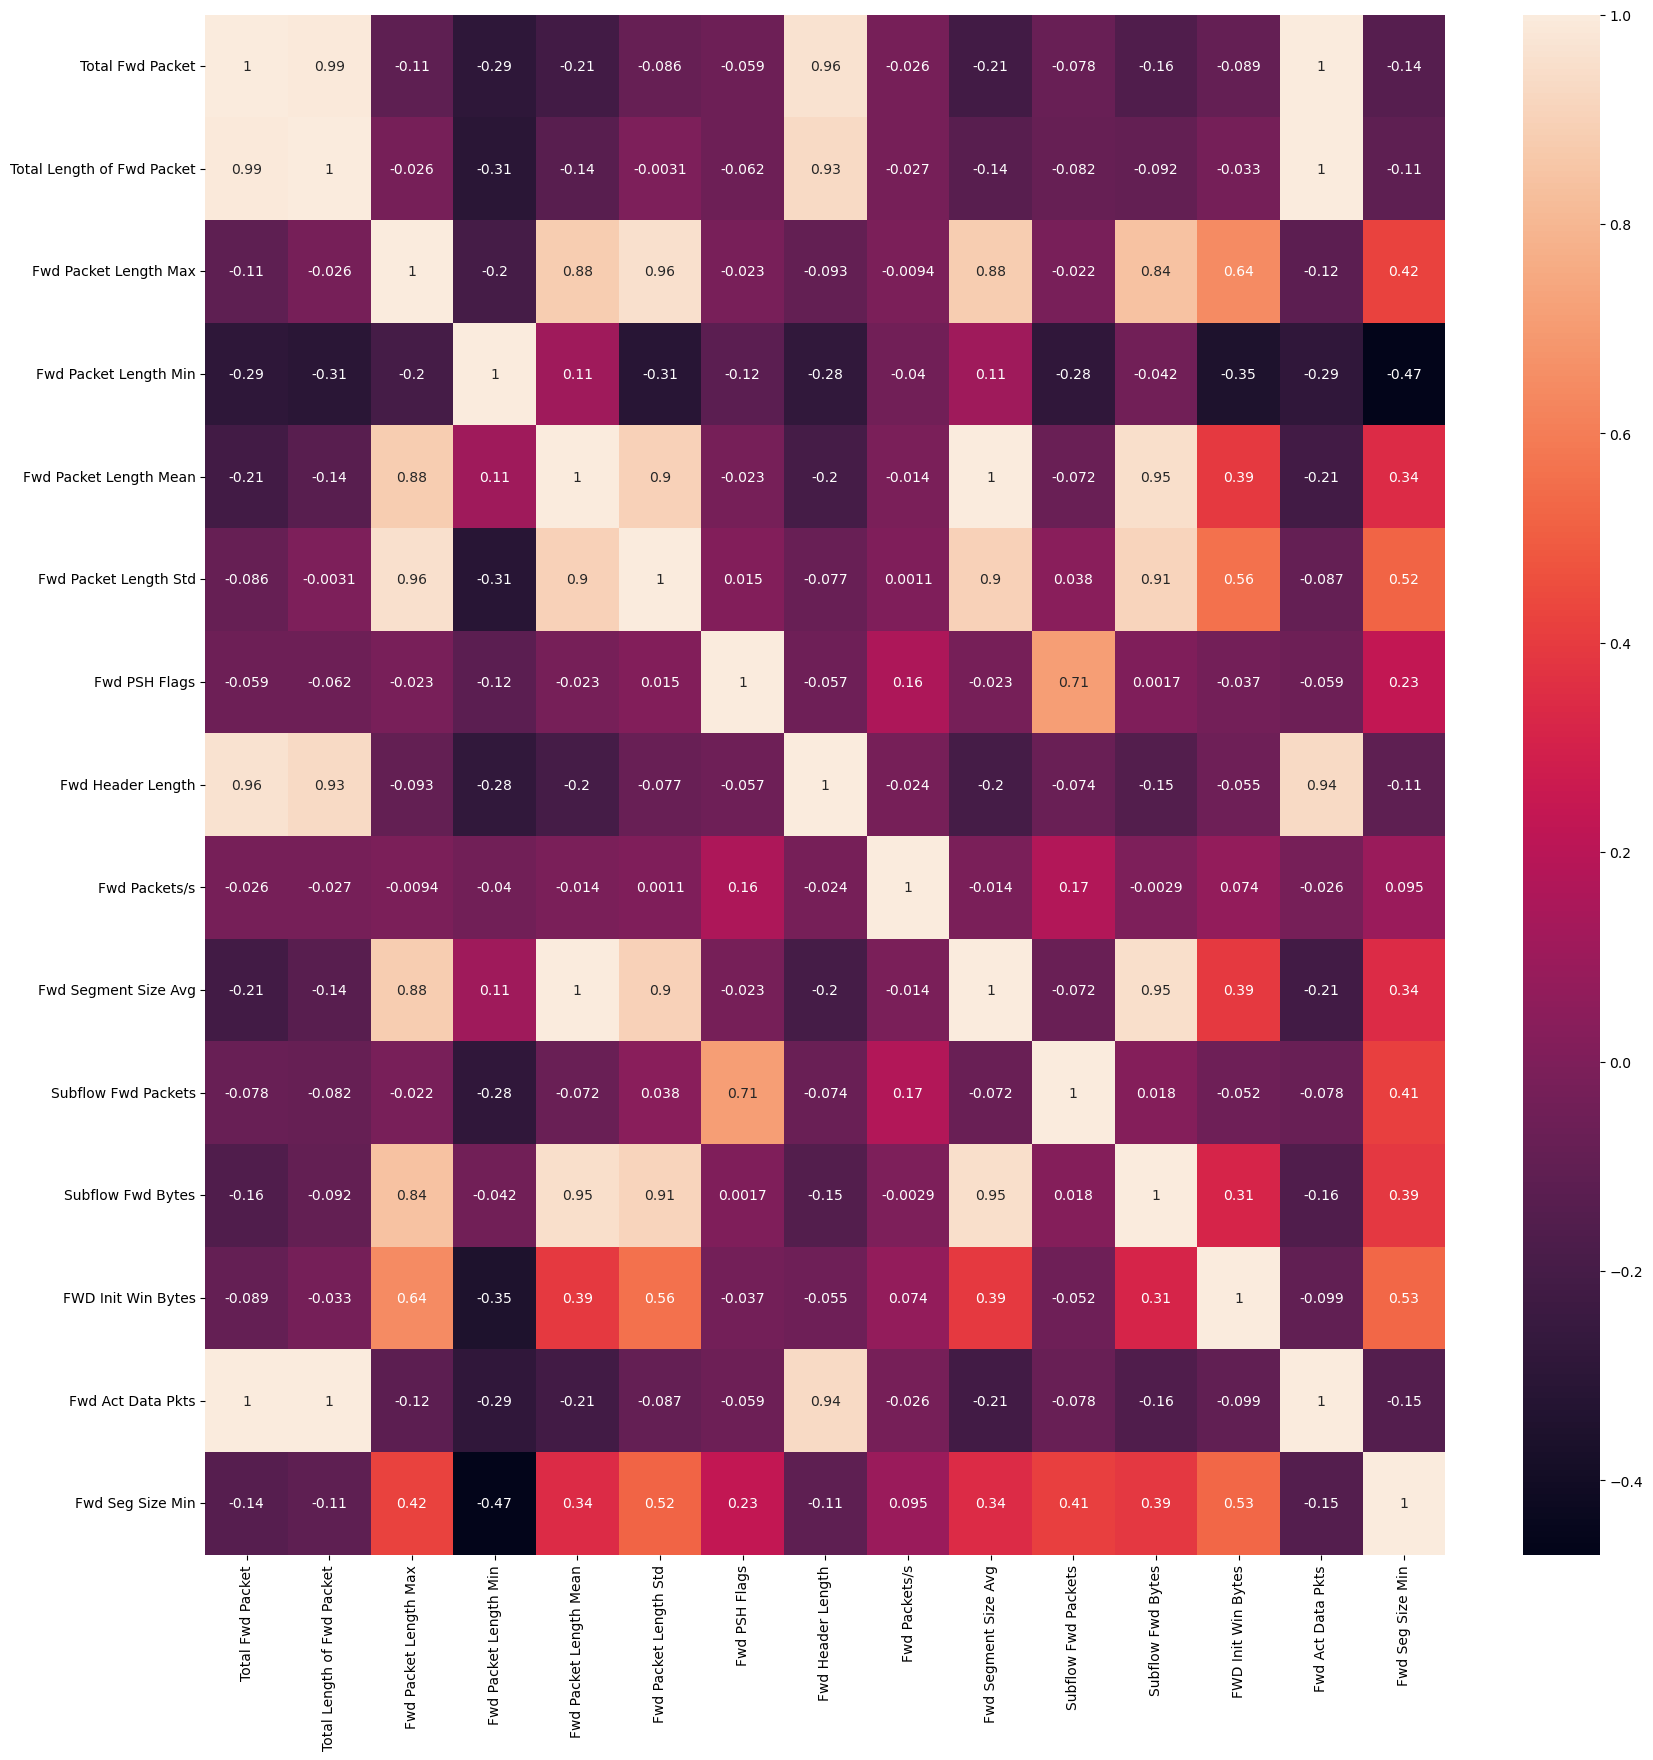

In [68]:
Feb5_Fwd = Feb5[['Total Fwd Packet',
                'Total Length of Fwd Packet',
                'Fwd Packet Length Max', 
                'Fwd Packet Length Min', 
                'Fwd Packet Length Mean', 
                'Fwd Packet Length Std', 
                'Fwd PSH Flags',  
                'Fwd Header Length', 
                'Fwd Packets/s', 
                'Fwd Segment Size Avg', 
                'Subflow Fwd Packets', 
                'Subflow Fwd Bytes', 
                'FWD Init Win Bytes', 
                'Fwd Act Data Pkts', 
                'Fwd Seg Size Min']]
plt.figure(figsize=(20,20))
sns.heatmap(Feb5_Fwd.corr(), annot=True)

Column to keep: 'Total Fwd Packet' - Reason: Easy Column to identify and hast almost perfect representation of 3 columns.
Resulting dropped columns: 'Total Length of Fwd Packet', 'Fwd Header Length', 'Fwd Act Data Pkts'

<Axes: >

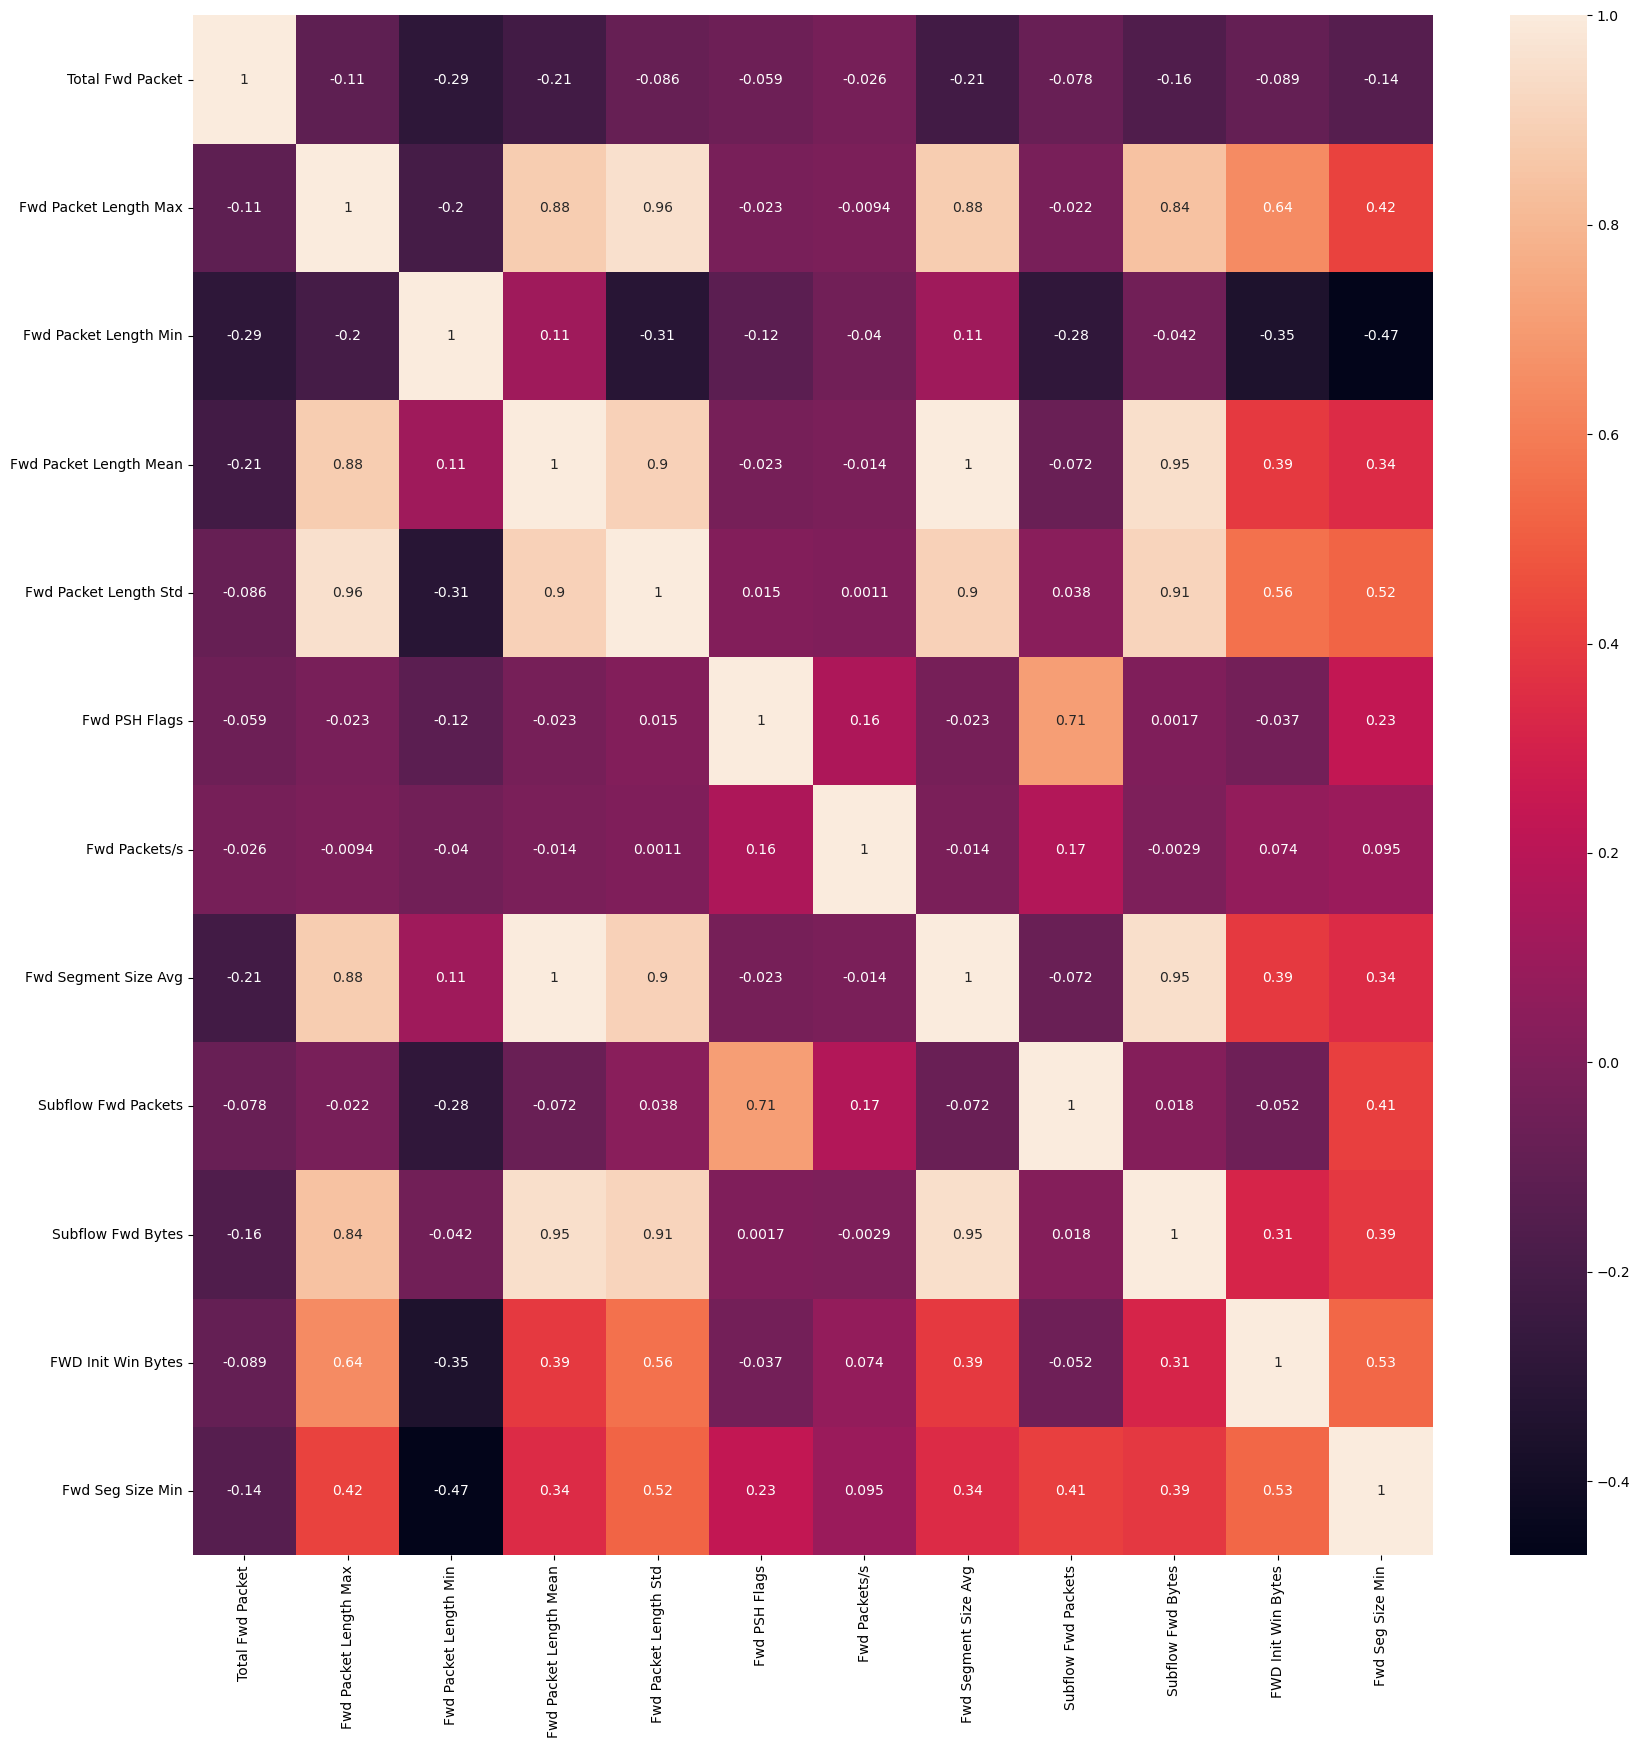

In [69]:
Feb5_Fwd = Feb5_Fwd.drop(columns=['Total Length of Fwd Packet', 'Fwd Header Length', 'Fwd Act Data Pkts'])
plt.figure(figsize=(20,20))
sns.heatmap(Feb5_Fwd.corr(), annot=True)

Column to keep: Fwd Packet Length Mean
Resulting dropped columns: 'Fwd Packet Length Max', 'Fwd Packet Length Std', 'Fwd Segment Size Avg', 'Subflow Fwd Bytes'

<Axes: >

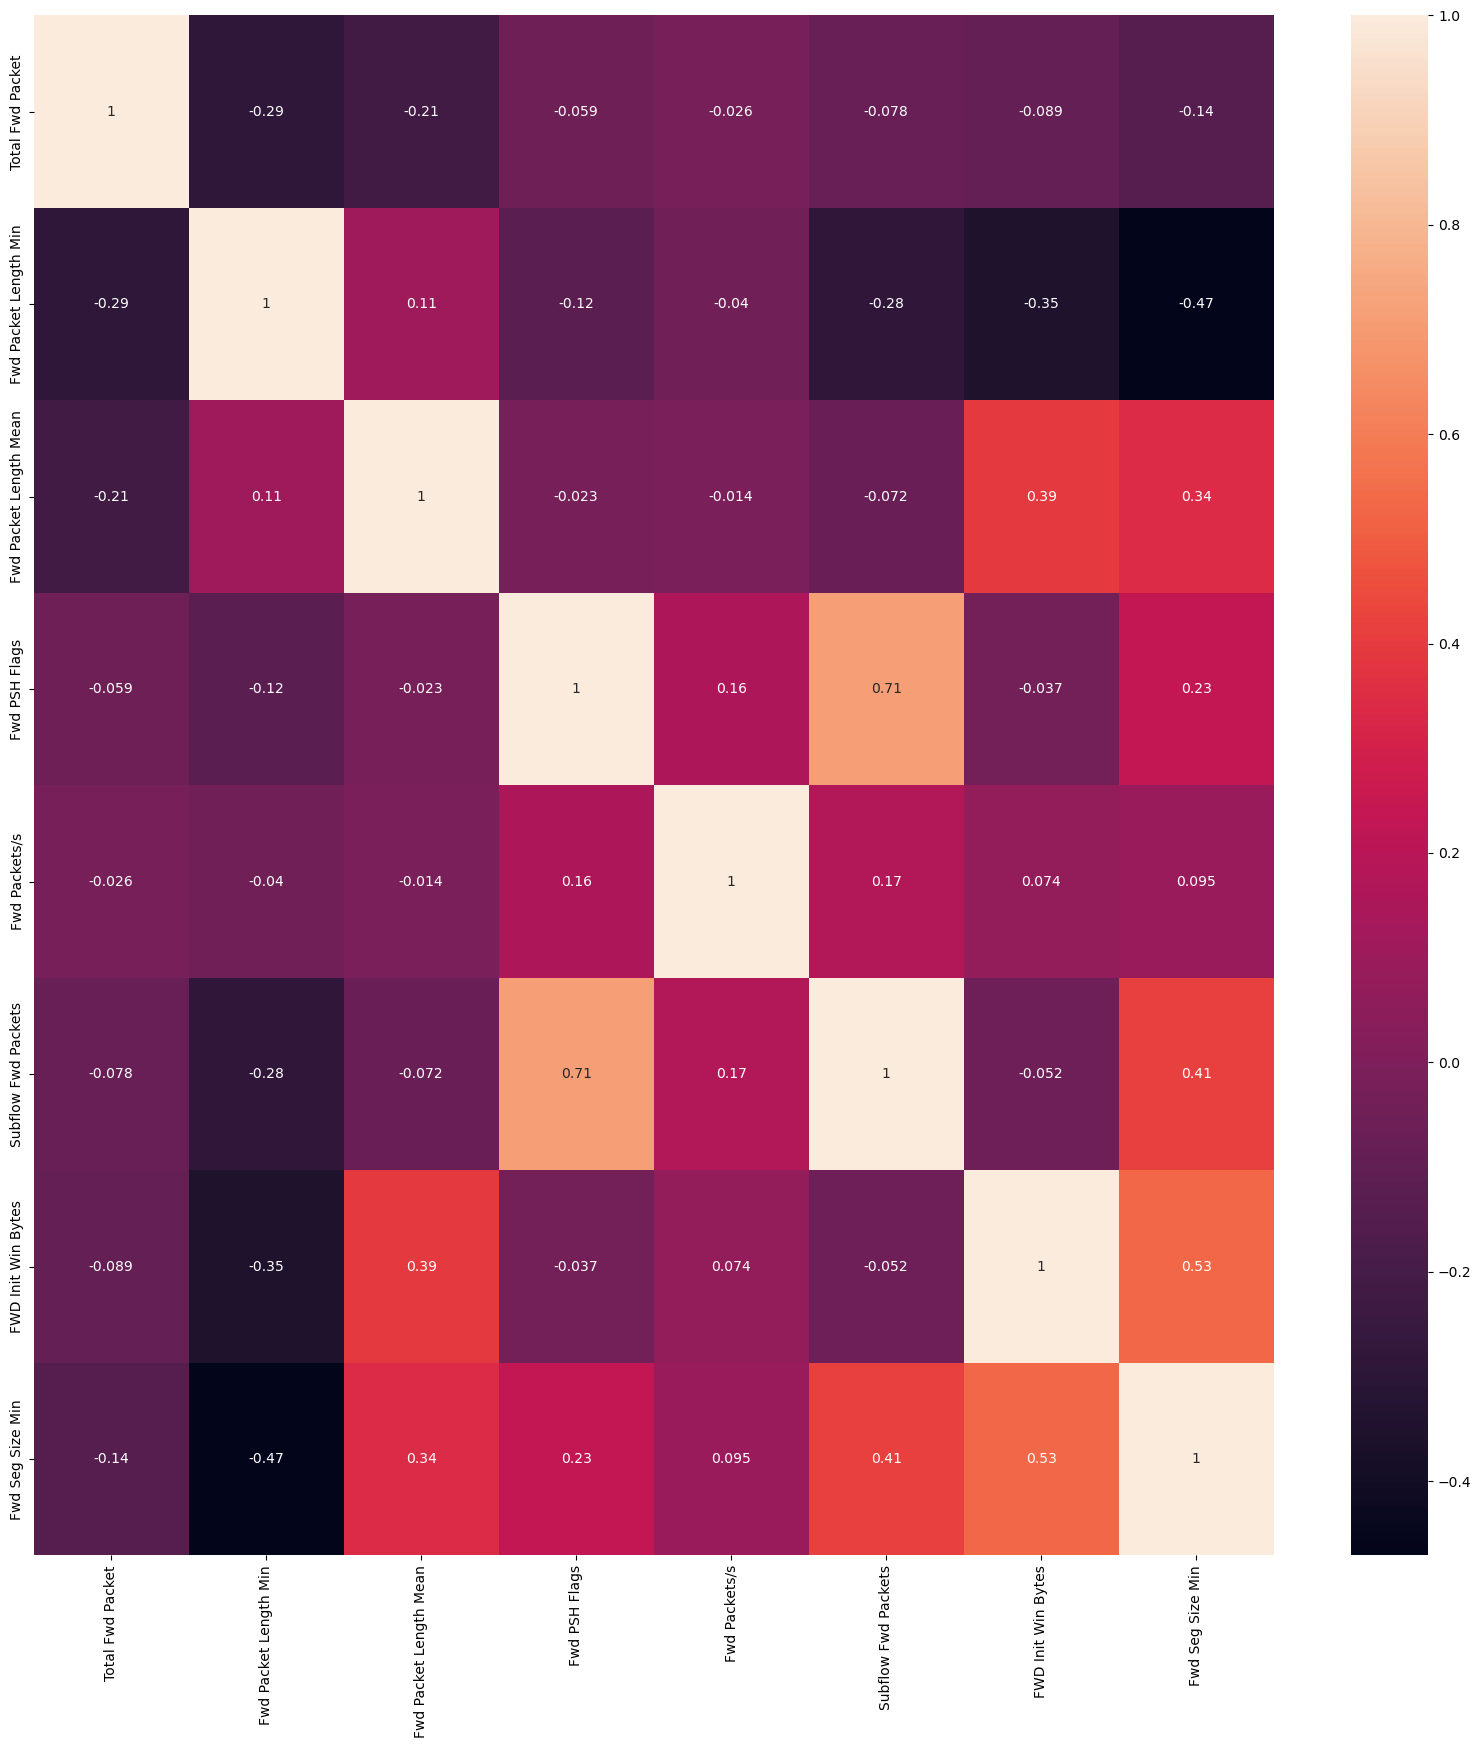

In [70]:
Feb5_Fwd = Feb5_Fwd.drop(columns=['Fwd Packet Length Max', 'Fwd Packet Length Std', 'Fwd Segment Size Avg', 'Subflow Fwd Bytes'])
plt.figure(figsize=(20,20))
sns.heatmap(Feb5_Fwd.corr(), annot=True)

Nothing over 85% means we can save a list of these columns to create our representitive database and compare correlation between groups.

In [71]:
Fwd_Cols = Feb5_Fwd.columns
Fwd_Cols = Fwd_Cols.to_list()
Fwd_Cols

['Total Fwd Packet',
 'Fwd Packet Length Min',
 'Fwd Packet Length Mean',
 'Fwd PSH Flags',
 'Fwd Packets/s',
 'Subflow Fwd Packets',
 'FWD Init Win Bytes',
 'Fwd Seg Size Min']

<Axes: >

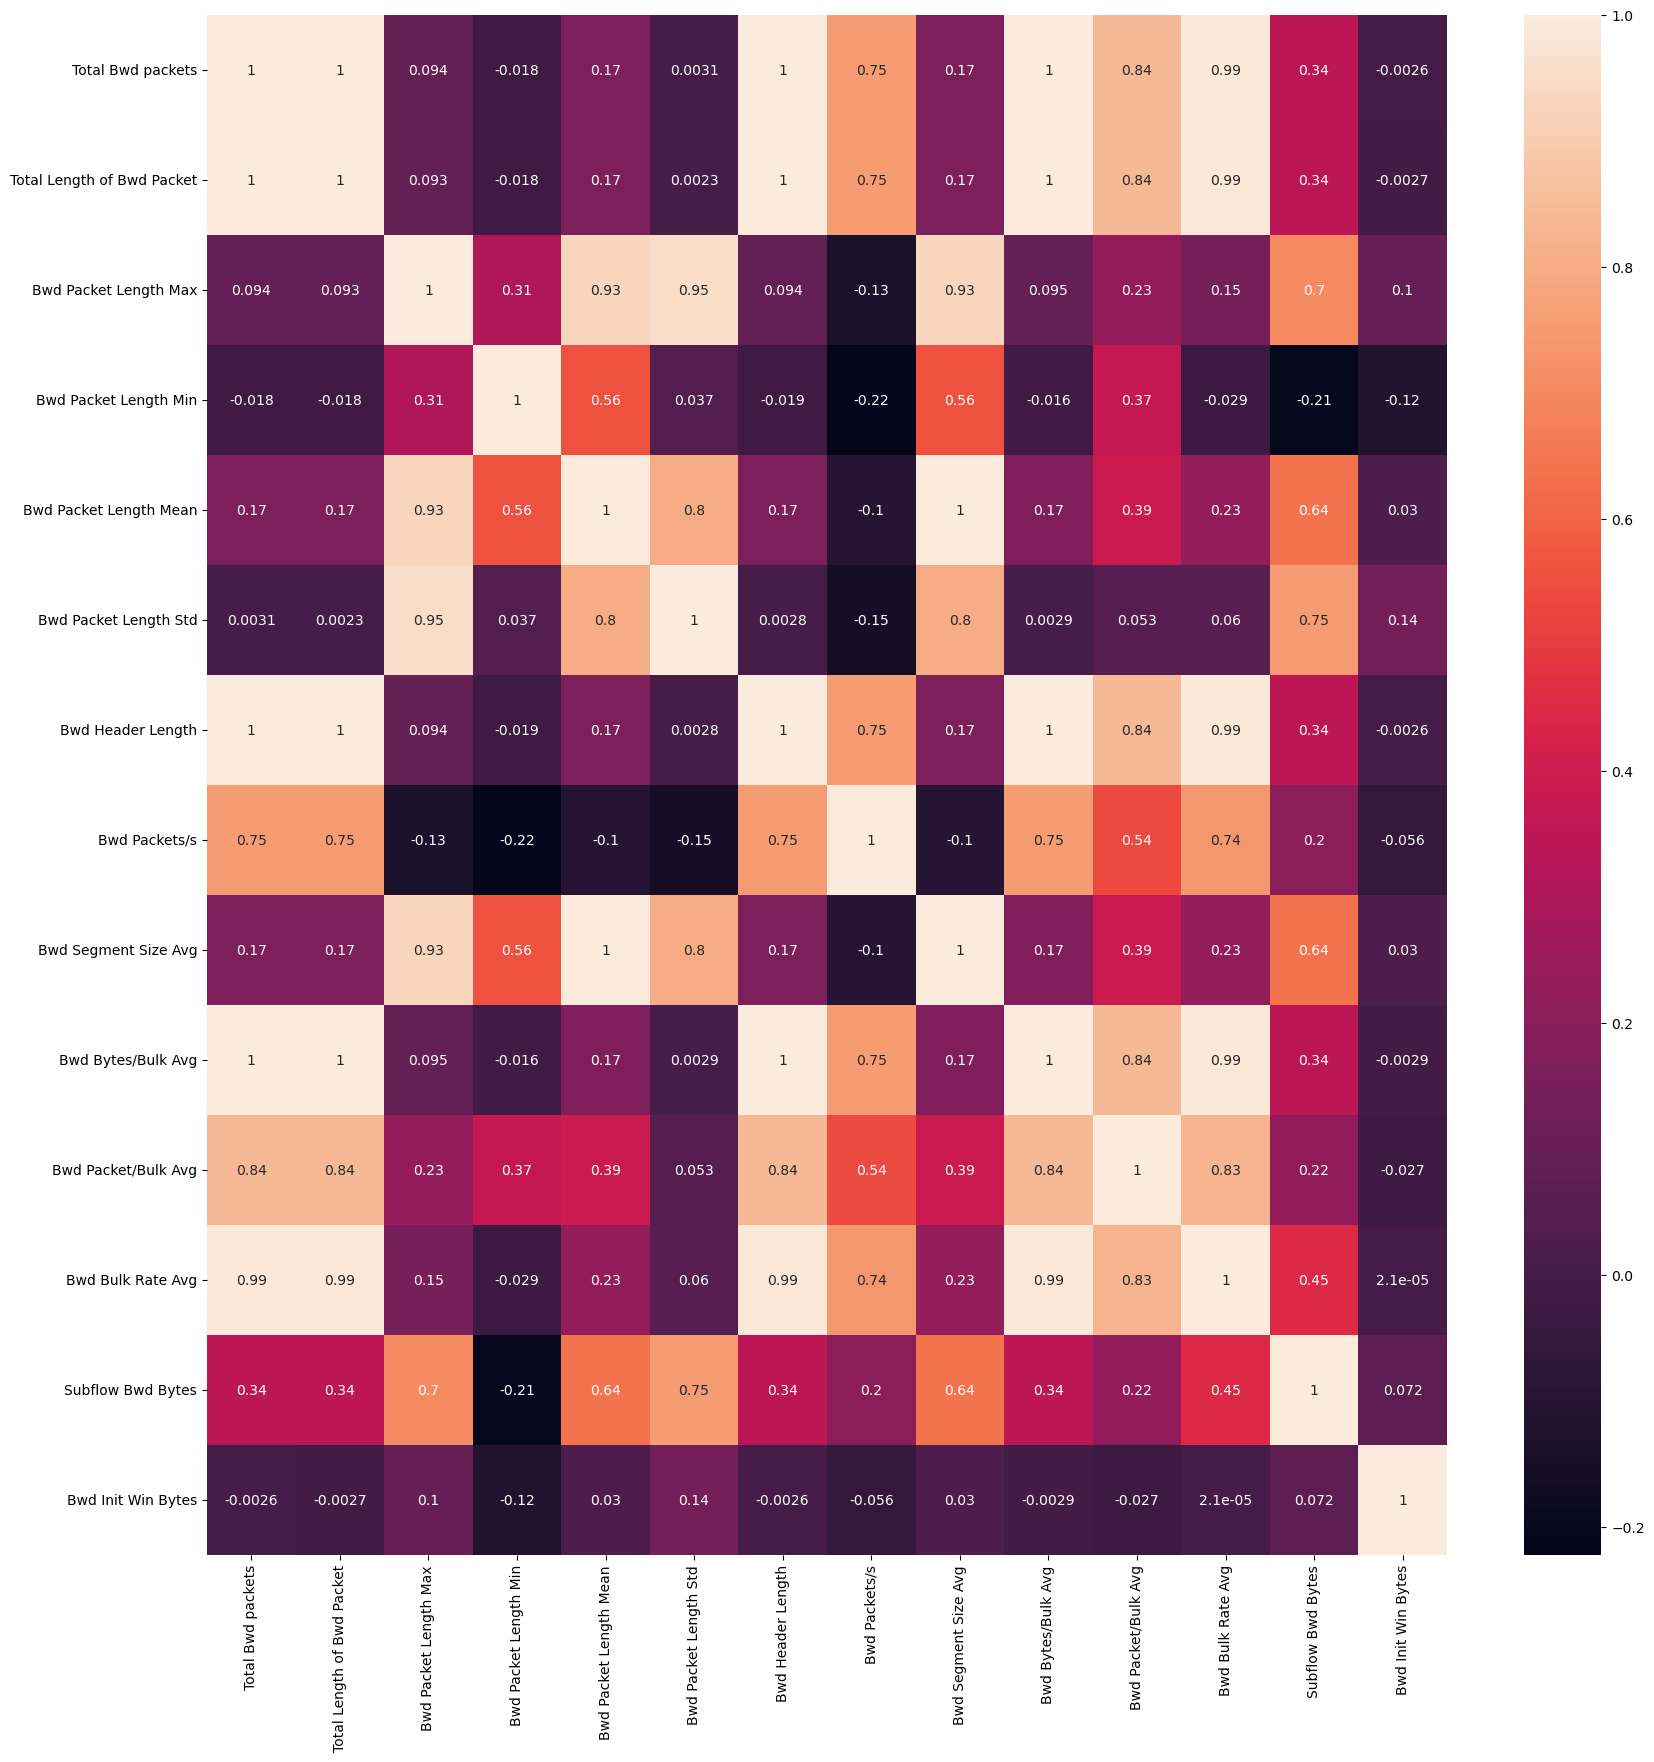

In [72]:
Feb5_Bwd = Feb5[['Total Bwd packets', 
      'Total Length of Bwd Packet', 
      'Bwd Packet Length Max', 
      'Bwd Packet Length Min', 
      'Bwd Packet Length Mean', 
      'Bwd Packet Length Std',   
      'Bwd Header Length',
      'Bwd Packets/s', 
      'Bwd Segment Size Avg', 
      'Bwd Bytes/Bulk Avg', 
      'Bwd Packet/Bulk Avg', 
      'Bwd Bulk Rate Avg', 
      'Subflow Bwd Bytes', 
      'Bwd Init Win Bytes']]
plt.figure(figsize=(20,20))
sns.heatmap(Feb5_Bwd.corr(), annot=True)

Column to Keep: 'Total Bwd packets'
Resulting Columns dropped: 'Total Length of Bwd Packet', 'Bwd Header Length', 'Bwd Bytes/Bulk Avg', 'Bwd Bulk Rate Avg'

<Axes: >

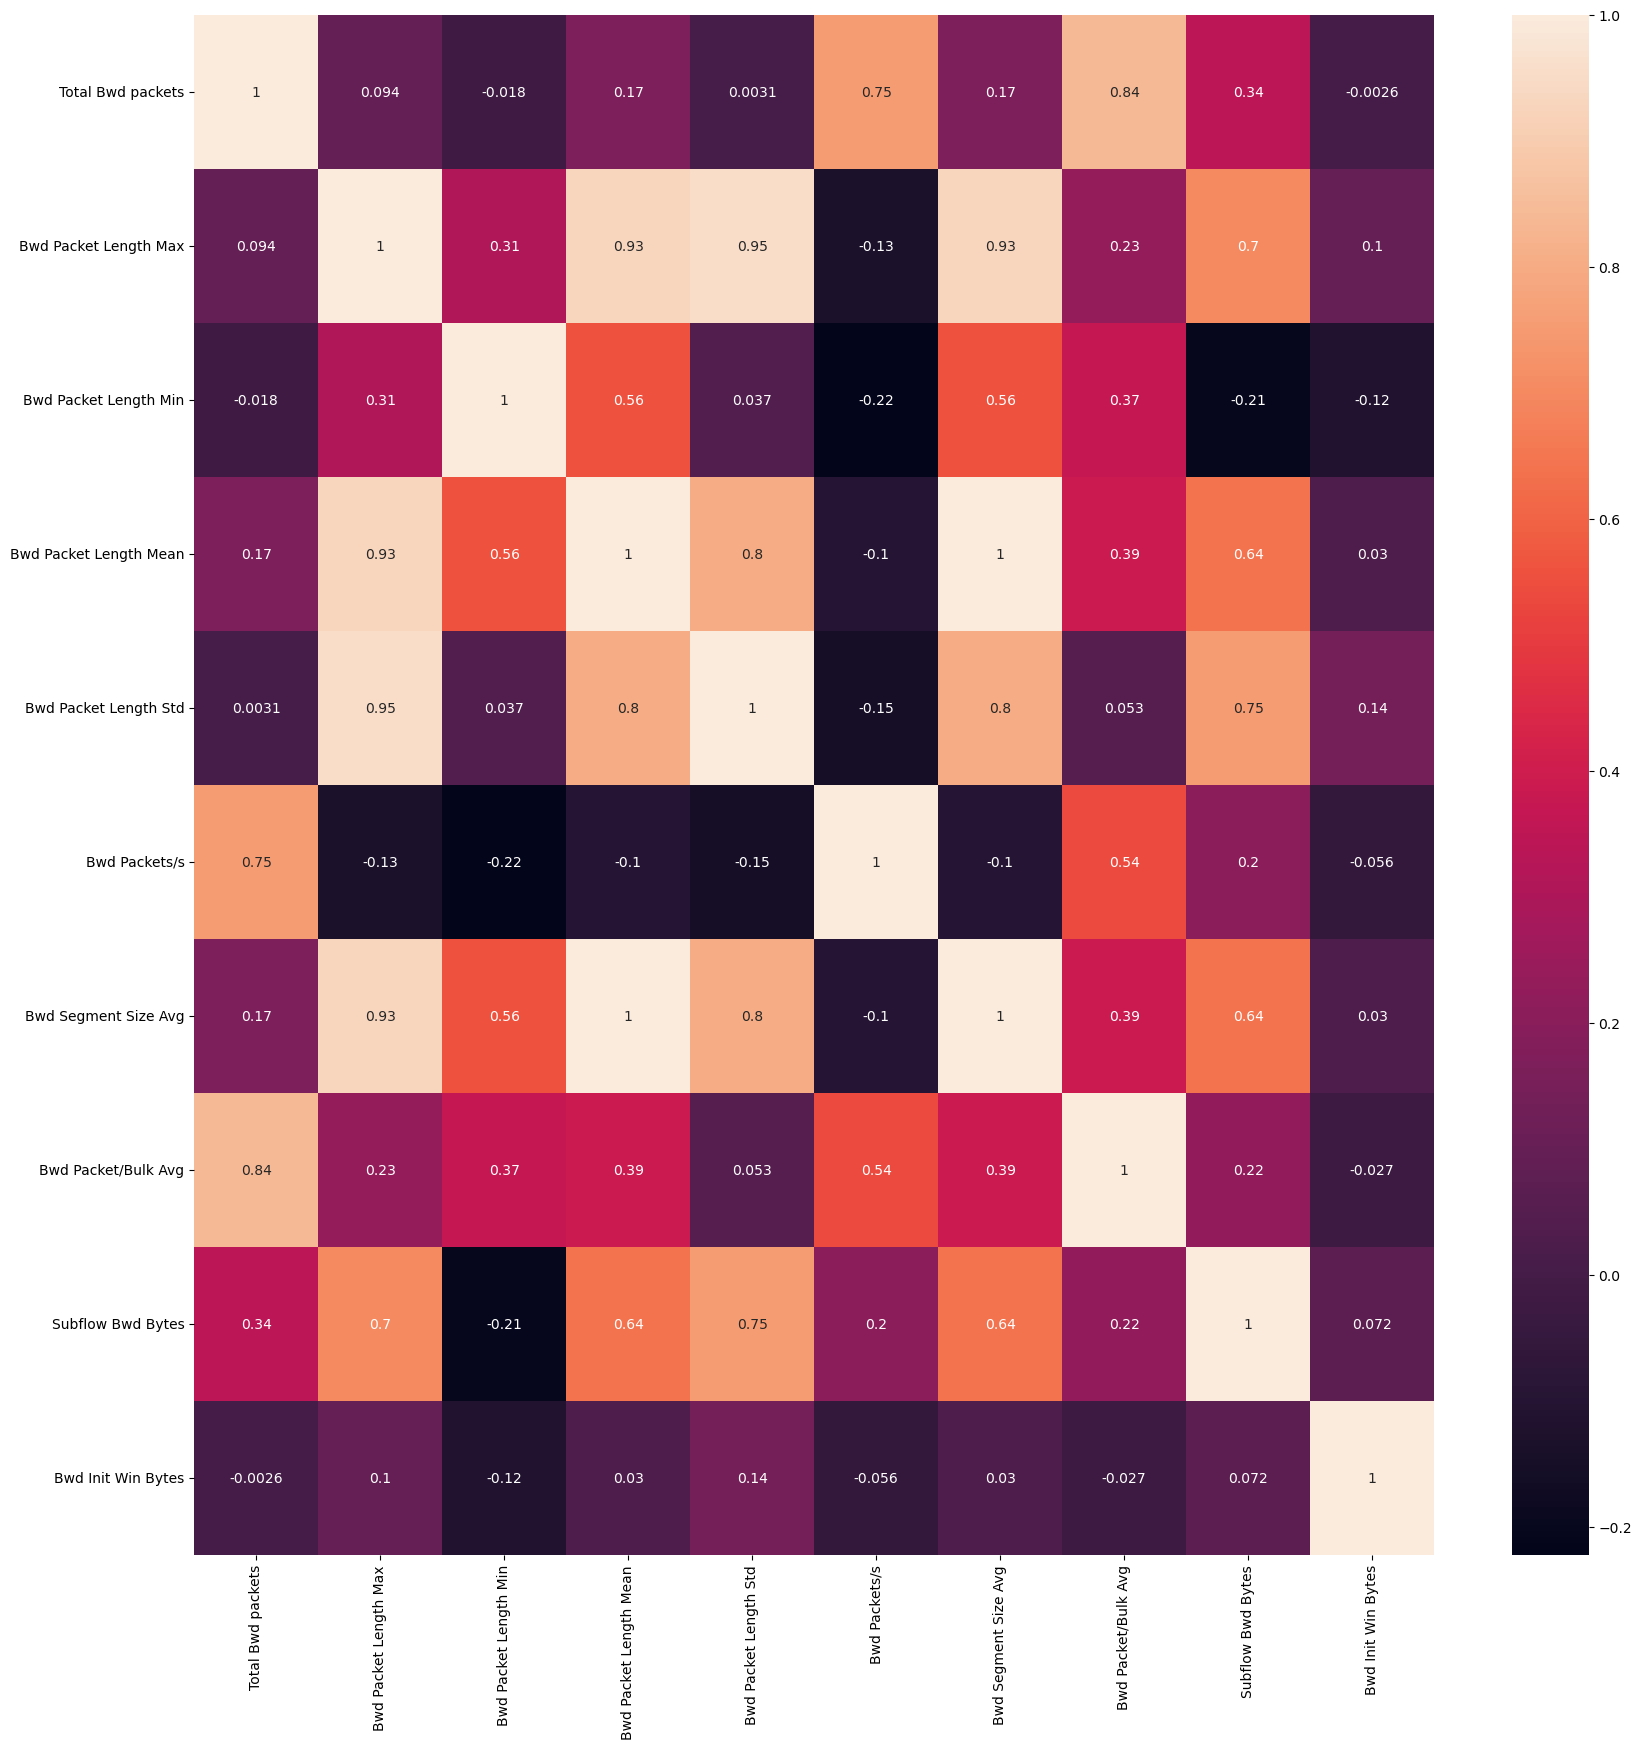

In [73]:
Feb5_Bwd = Feb5_Bwd.drop(columns=['Total Length of Bwd Packet', 'Bwd Header Length', 'Bwd Bytes/Bulk Avg', 'Bwd Bulk Rate Avg'])
plt.figure(figsize=(20,20))
sns.heatmap(Feb5_Bwd.corr(), annot=True)

Column to keep: 'Bwd Packet Length Max'
Resulting Columns dropped: 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Bwd Segment Size Avg'

<Axes: >

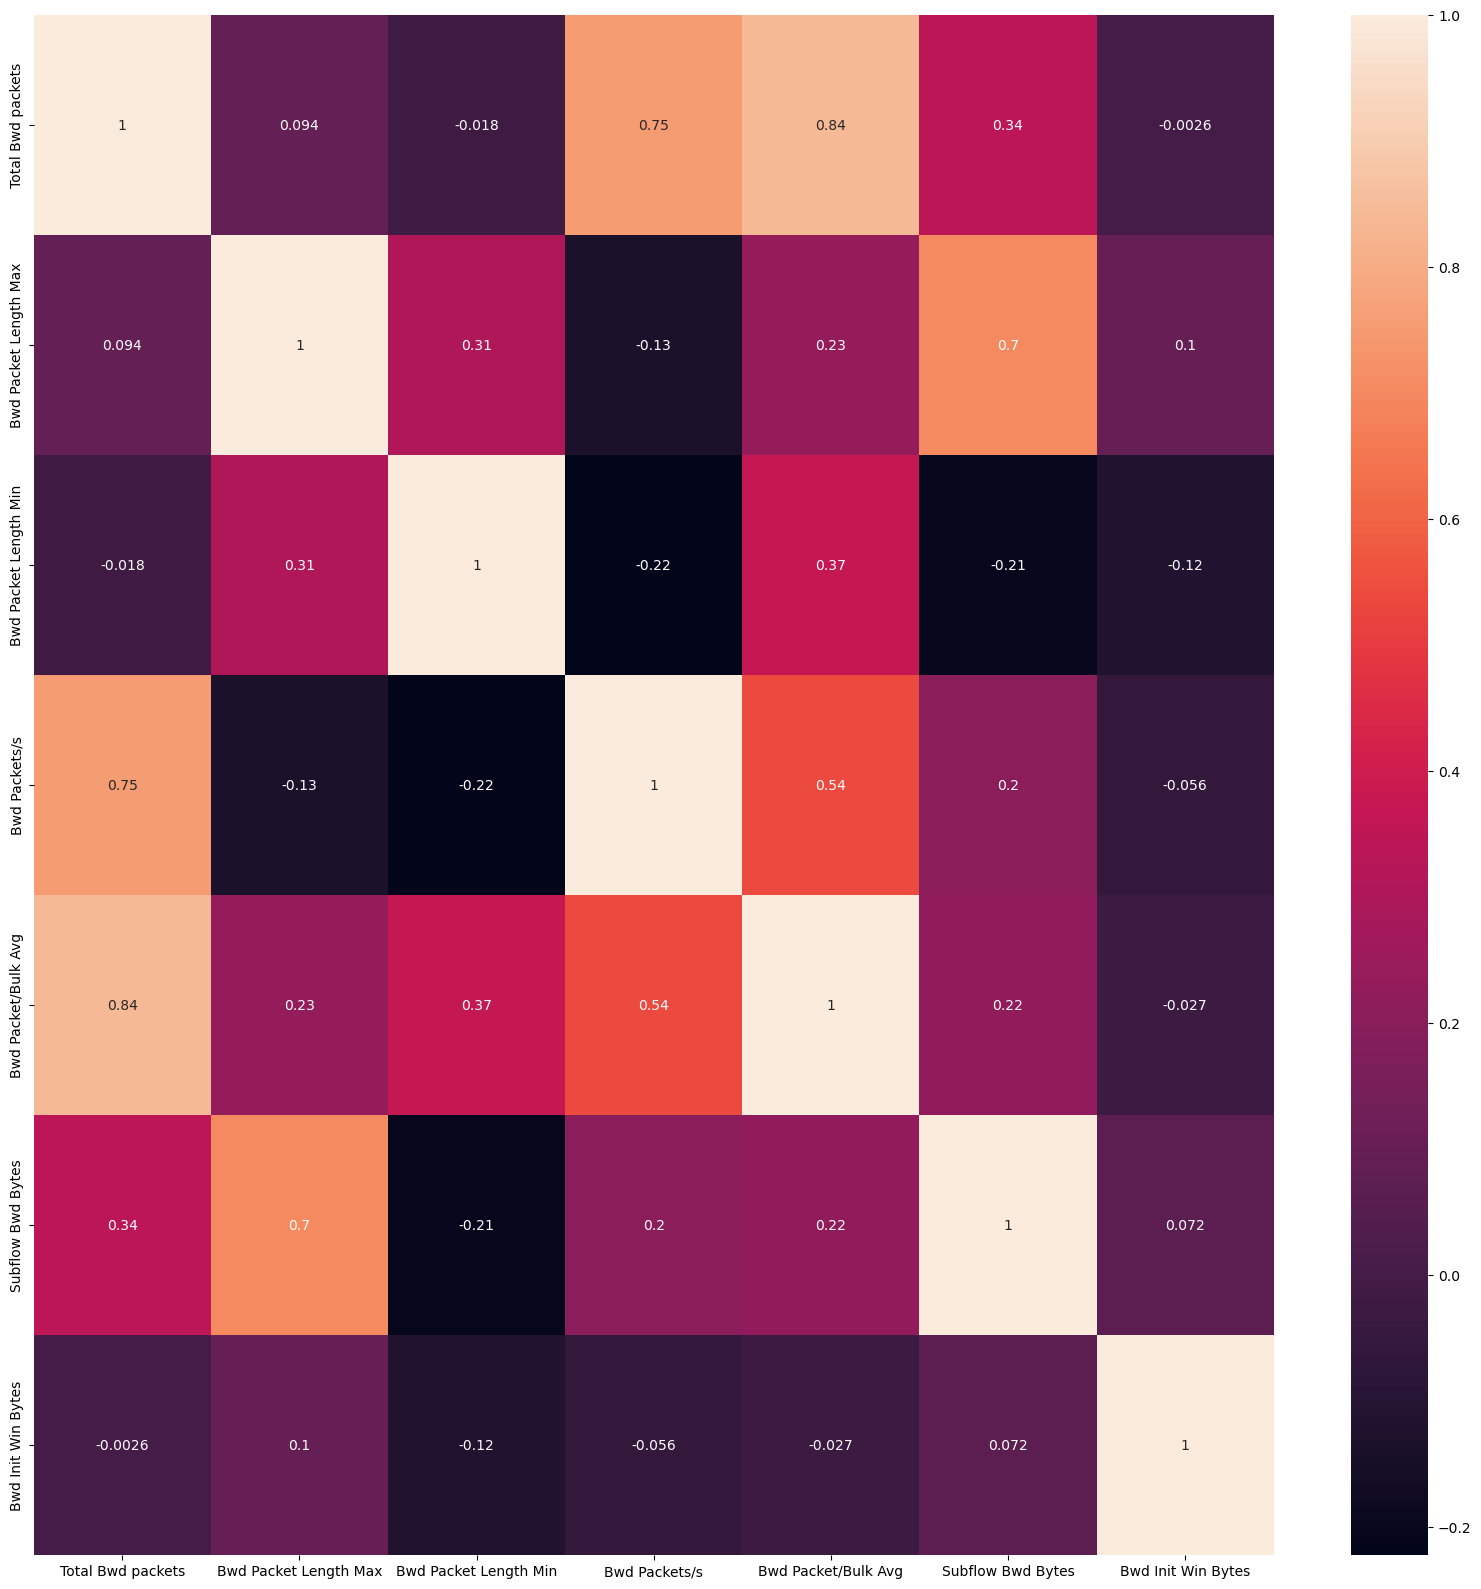

In [74]:
Feb5_Bwd = Feb5_Bwd.drop(columns=['Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Bwd Segment Size Avg'])
plt.figure(figsize=(20,20))
sns.heatmap(Feb5_Bwd.corr(), annot=True)

In [ ]:
Feb5_Bwd = 

<Axes: >

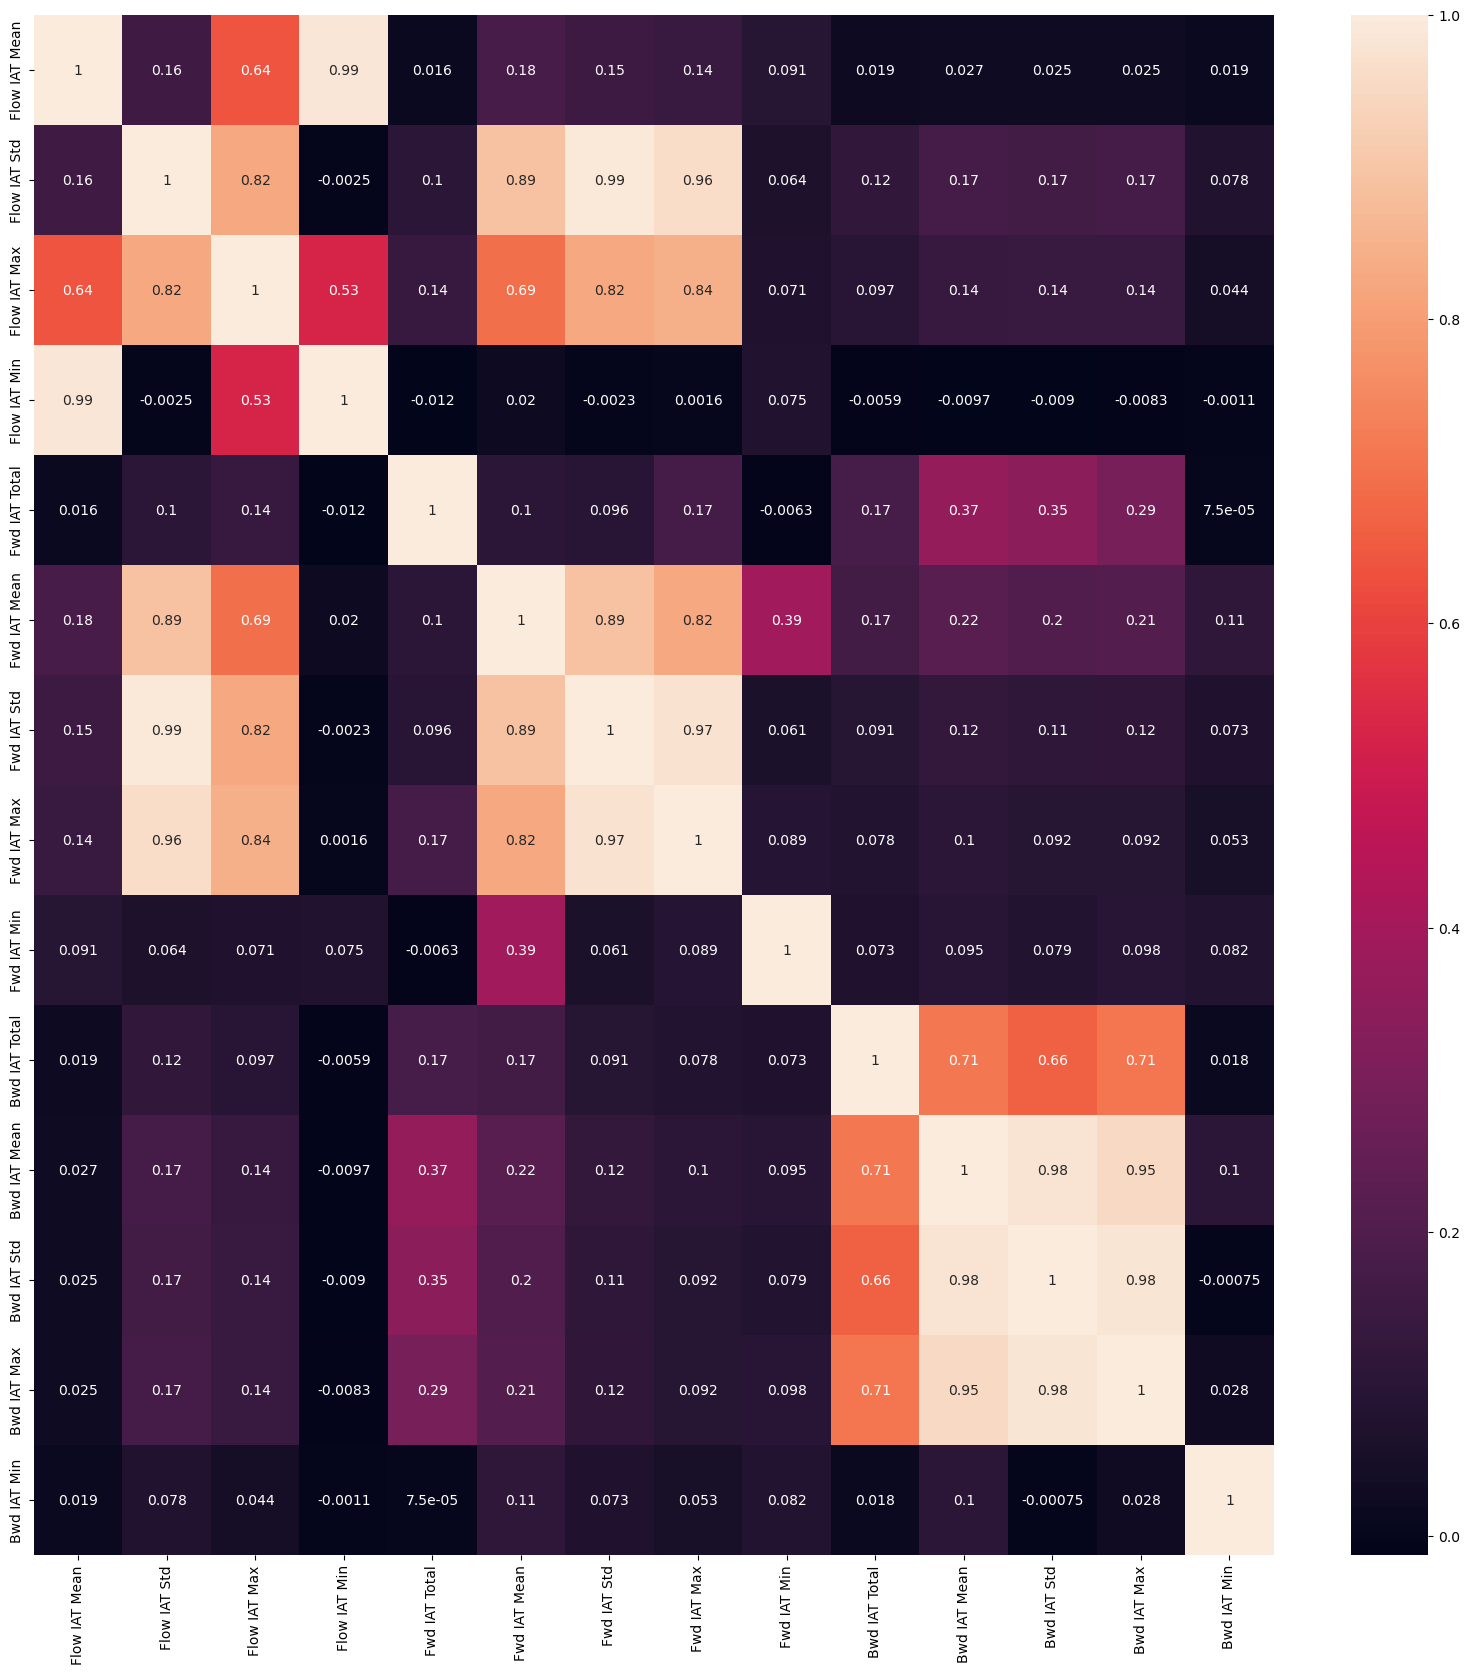

In [75]:
Feb5_IAT = Feb5[['Flow IAT Mean', 
                 'Flow IAT Std', 
                 'Flow IAT Max', 
                 'Flow IAT Min', 
                 'Fwd IAT Total', 
                 'Fwd IAT Mean', 
                 'Fwd IAT Std', 
                 'Fwd IAT Max', 
                 'Fwd IAT Min', 
                 'Bwd IAT Total', 
                 'Bwd IAT Mean', 
                 'Bwd IAT Std',
                 'Bwd IAT Max', 
                 'Bwd IAT Min']]
plt.figure(figsize=(20,20))
sns.heatmap(Feb5_IAT.corr(),annot=True)

### Columns to Drop: 
'Bwd IAT Min','Bwd IAT Max', 'BWD IAT Mean' 'Flow IAT Std', 

In [43]:
def remove_highly_correlated_columns(df, threshold=0.7):
    original_column_count = df.shape[1]
    corr_matrix = df.corr().abs()
    to_drop = []

    for column in corr_matrix.columns:
        # Exclude already-marked columns from consideration
        if column in to_drop:
            continue

        # Get correlation values of this column with all others (excluding self-correlation)
        correlations = corr_matrix[column].drop(labels=[column])
        
        # Check if it's correlated above threshold with *all* other columns
        if all(correlations > threshold):
            to_drop.append(column)

    df_filtered = df.drop(columns=to_drop)
    new_column_count = df_filtered.shape[1]

    return df_filtered, original_column_count, new_column_count
remove_highly_correlated_columns(Feb5_IAT)

(      Flow IAT Mean  Flow IAT Std  Flow IAT Max  Flow IAT Min  Fwd IAT Total  \
 0       9810.213795   3939.927183      175637.0          20.0     30009444.0   
 1       9848.509514   4081.495899      176520.0          23.0     30018257.0   
 2       9478.992104   3300.014238      176341.0          22.0     30010489.0   
 3       9911.845773   4287.970416      177392.0          25.0     30013069.0   
 4       9867.437541   4107.546462      177486.0          11.0     30016745.0   
 ...             ...           ...           ...           ...            ...   
 1945   47398.001580  45015.009503      433525.0         157.0     30002935.0   
 1946   51304.504288  45346.131991      301136.0          42.0     29910526.0   
 1947   48951.000000  45277.040707      326741.0         153.0     29958012.0   
 1948   47025.579937  42694.348286      251326.0         243.0     30002320.0   
 1949   49437.021417  46962.779360      478656.0         123.0     30008272.0   
 
       Fwd IAT Mean   Fwd 

In [ ]:
Feb5_Misc = Feb5[['Flow ID', 
                  'Src IP', 
                  'Src Port', 
                  'Dst IP', 
                  'Dst Port', 
                  'Protocol', 
                  'Timestamp', 
                  'Flow Duration', 
                  'Flow Bytes/s', 
                  'Flow Packets/s', 
                  'Packet Length Min', 
                  'Packet Length Max', 
                  'Packet Length Mean', 
                  'Packet Length Std', 
                  'Packet Length Variance', 
                  'Down/Up Ratio', 
                  'Average Packet Size',
                  'Label']]

In [7]:
reader = geoip2.database.Reader('/Users/sa12/Documents/Repositories/The-CyberChase/CybercrimeData/GeoLite2-City.mmdb')
# Build location info
locations = []

for ip in Feb5['Src IP']:
    try:
        response = reader.city(ip)
        country = response.country.name or "Unknown Country"
        city = response.city.name or "Unknown City"

        location_str = f"{country}"
    except Exception as e:
        location_str = f"Error: {e}"

    locations.append(location_str)

# Add to DataFrame
Feb5['Location'] = locations
Feb5

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Location
0,129.226.189.21-10.1.0.4-36211-123-17,129.226.189.21,36211,10.1.0.4,123,17,2023-02-05 23:02:50,30009444,3056,4,...,0.0,0.0,0.0,0.0,1.675638e+15,0.0,1.675638e+15,1.675638e+15,ddospot,Hong Kong
1,129.226.189.21-10.1.0.4-40528-123-17,129.226.189.21,40528,10.1.0.4,123,17,2023-02-05 23:02:50,30018257,3045,4,...,0.0,0.0,0.0,0.0,1.675638e+15,0.0,1.675638e+15,1.675638e+15,ddospot,Hong Kong
2,129.226.189.21-10.1.0.4-33823-123-17,129.226.189.21,33823,10.1.0.4,123,17,2023-02-05 23:02:50,30010489,3163,4,...,0.0,0.0,0.0,0.0,1.675638e+15,0.0,1.675638e+15,1.675638e+15,ddospot,Hong Kong
3,129.226.189.21-10.1.0.4-34706-123-17,129.226.189.21,34706,10.1.0.4,123,17,2023-02-05 23:02:50,30013069,3025,4,...,0.0,0.0,0.0,0.0,1.675638e+15,0.0,1.675638e+15,1.675638e+15,ddospot,Hong Kong
4,129.226.189.21-10.1.0.4-33563-123-17,129.226.189.21,33563,10.1.0.4,123,17,2023-02-05 23:02:50,30016745,3039,4,...,0.0,0.0,0.0,0.0,1.675638e+15,0.0,1.675638e+15,1.675638e+15,ddospot,Hong Kong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,149.104.157.109-10.1.0.4-6749-123-17,149.104.157.109,6749,10.1.0.4,123,17,2023-02-05 23:59:51,30002935,630,4,...,0.0,0.0,0.0,0.0,1.675642e+15,0.0,1.675642e+15,1.675642e+15,ddospot,Hong Kong
1946,149.104.157.109-10.1.0.4-62335-123-17,149.104.157.109,62335,10.1.0.4,123,17,2023-02-05 23:59:51,29910526,580,4,...,0.0,0.0,0.0,0.0,1.675642e+15,0.0,1.675642e+15,1.675642e+15,ddospot,Hong Kong
1947,149.104.157.109-10.1.0.4-254-123-17,149.104.157.109,254,10.1.0.4,123,17,2023-02-05 23:59:51,29958012,609,4,...,0.0,0.0,0.0,0.0,1.675642e+15,0.0,1.675642e+15,1.675642e+15,ddospot,Hong Kong
1948,149.104.157.109-10.1.0.4-40468-123-17,149.104.157.109,40468,10.1.0.4,123,17,2023-02-05 23:59:51,30002320,635,4,...,0.0,0.0,0.0,0.0,1.675642e+15,0.0,1.675642e+15,1.675642e+15,ddospot,Hong Kong


<Axes: ylabel='Location'>

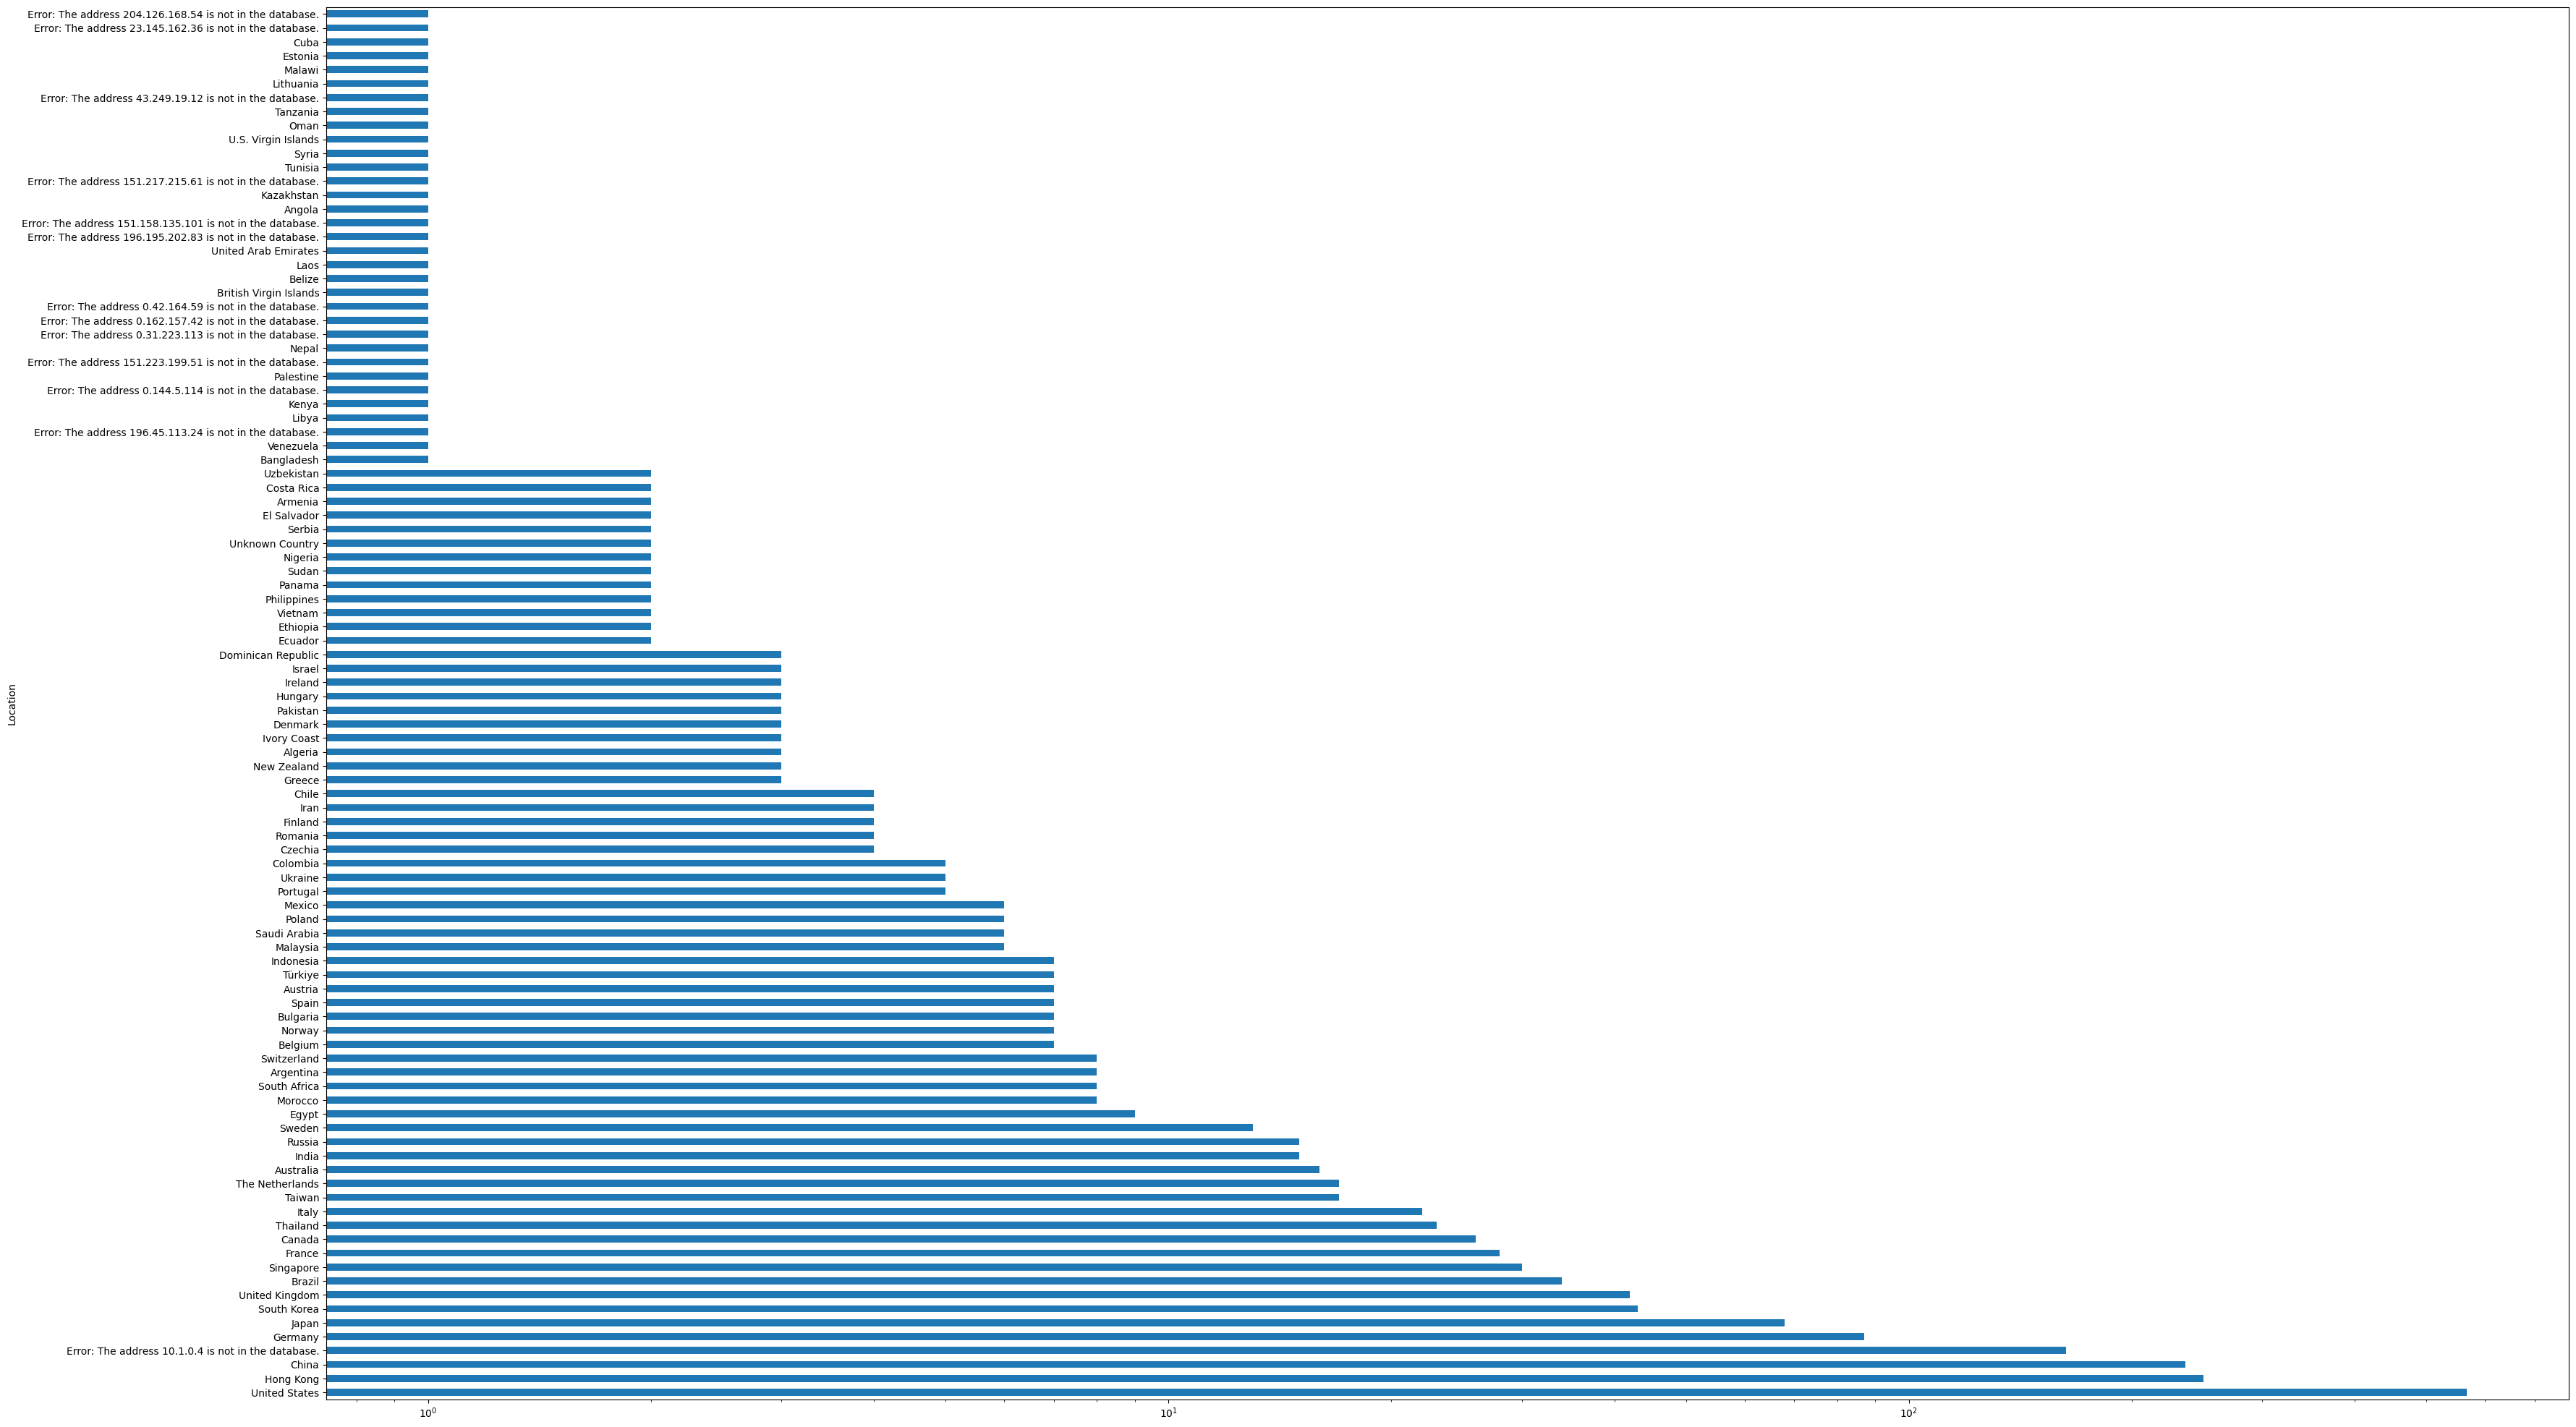

In [8]:
Feb5['Location'].value_counts().plot(kind='barh', figsize=(40,25), logx=True)


In [4]:
# Build location info
locations_2 = []

for ip in Feb6['Src IP']:
    try:
        response = reader.city(ip)
        country = response.country.name or "Unknown Country"
        city = response.city.name or "Unknown City"

        location_str = f"{country}"
    except Exception as e:
        location_str = f"Error: {e}"

    locations_2.append(location_str)

# Add to DataFrame
Feb6['Location'] = locations_2
Feb6

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Location
0,61.177.172.145-10.1.0.4-37881-22-6,61.177.172.145,37881,10.1.0.4,22,6,2023-02-06 00:00:15,582135,3,4,...,0.0,0.0,0.0,0.0,1.675642e+15,0.000000e+00,1.675642e+15,1.675642e+15,cowrie,Error: name 'reader' is not defined
1,61.177.172.145-10.1.0.4-37881-22-6,61.177.172.145,37881,10.1.0.4,22,6,2023-02-06 00:00:17,395,3,0,...,0.0,0.0,0.0,0.0,1.675642e+15,0.000000e+00,1.675642e+15,1.675642e+15,cowrie,Error: name 'reader' is not defined
2,91.195.240.12-10.1.0.4-5960-123-17,91.195.240.12,5960,10.1.0.4,123,17,2023-02-06 00:00:48,30007782,557,4,...,0.0,0.0,0.0,0.0,1.675642e+15,0.000000e+00,1.675642e+15,1.675642e+15,ddospot,Error: name 'reader' is not defined
3,91.195.240.12-10.1.0.4-4689-123-17,91.195.240.12,4689,10.1.0.4,123,17,2023-02-06 00:00:48,29992657,591,4,...,0.0,0.0,0.0,0.0,1.675642e+15,0.000000e+00,1.675642e+15,1.675642e+15,ddospot,Error: name 'reader' is not defined
4,91.195.240.12-10.1.0.4-3683-123-17,91.195.240.12,3683,10.1.0.4,123,17,2023-02-06 00:00:48,30013940,615,4,...,0.0,0.0,0.0,0.0,1.675642e+15,0.000000e+00,1.675642e+15,1.675642e+15,ddospot,Error: name 'reader' is not defined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162273,95.162.223.26-10.1.0.4-50900-123-17,95.162.223.26,50900,10.1.0.4,123,17,2023-02-06 23:59:59,28213032,2,0,...,0.0,0.0,0.0,0.0,8.378640e+14,1.184919e+15,1.675728e+15,2.821303e+07,ddospot,Error: name 'reader' is not defined
162274,95.162.223.26-10.1.0.4-59861-123-17,95.162.223.26,59861,10.1.0.4,123,17,2023-02-06 23:59:59,80298510,2,0,...,0.0,0.0,0.0,0.0,8.378640e+14,1.184919e+15,1.675728e+15,8.029851e+07,ddospot,Error: name 'reader' is not defined
162275,95.162.210.103-10.1.0.4-1492-123-17,95.162.210.103,1492,10.1.0.4,123,17,2023-02-06 23:59:59,62600014,2,0,...,0.0,0.0,0.0,0.0,8.378640e+14,1.184919e+15,1.675728e+15,6.260001e+07,ddospot,Error: name 'reader' is not defined
162276,95.162.215.209-10.1.0.4-64689-123-17,95.162.215.209,64689,10.1.0.4,123,17,2023-02-06 23:59:59,114660707,2,0,...,0.0,0.0,0.0,0.0,8.378641e+14,1.184919e+15,1.675728e+15,1.146607e+08,ddospot,Error: name 'reader' is not defined


<Axes: ylabel='Location'>

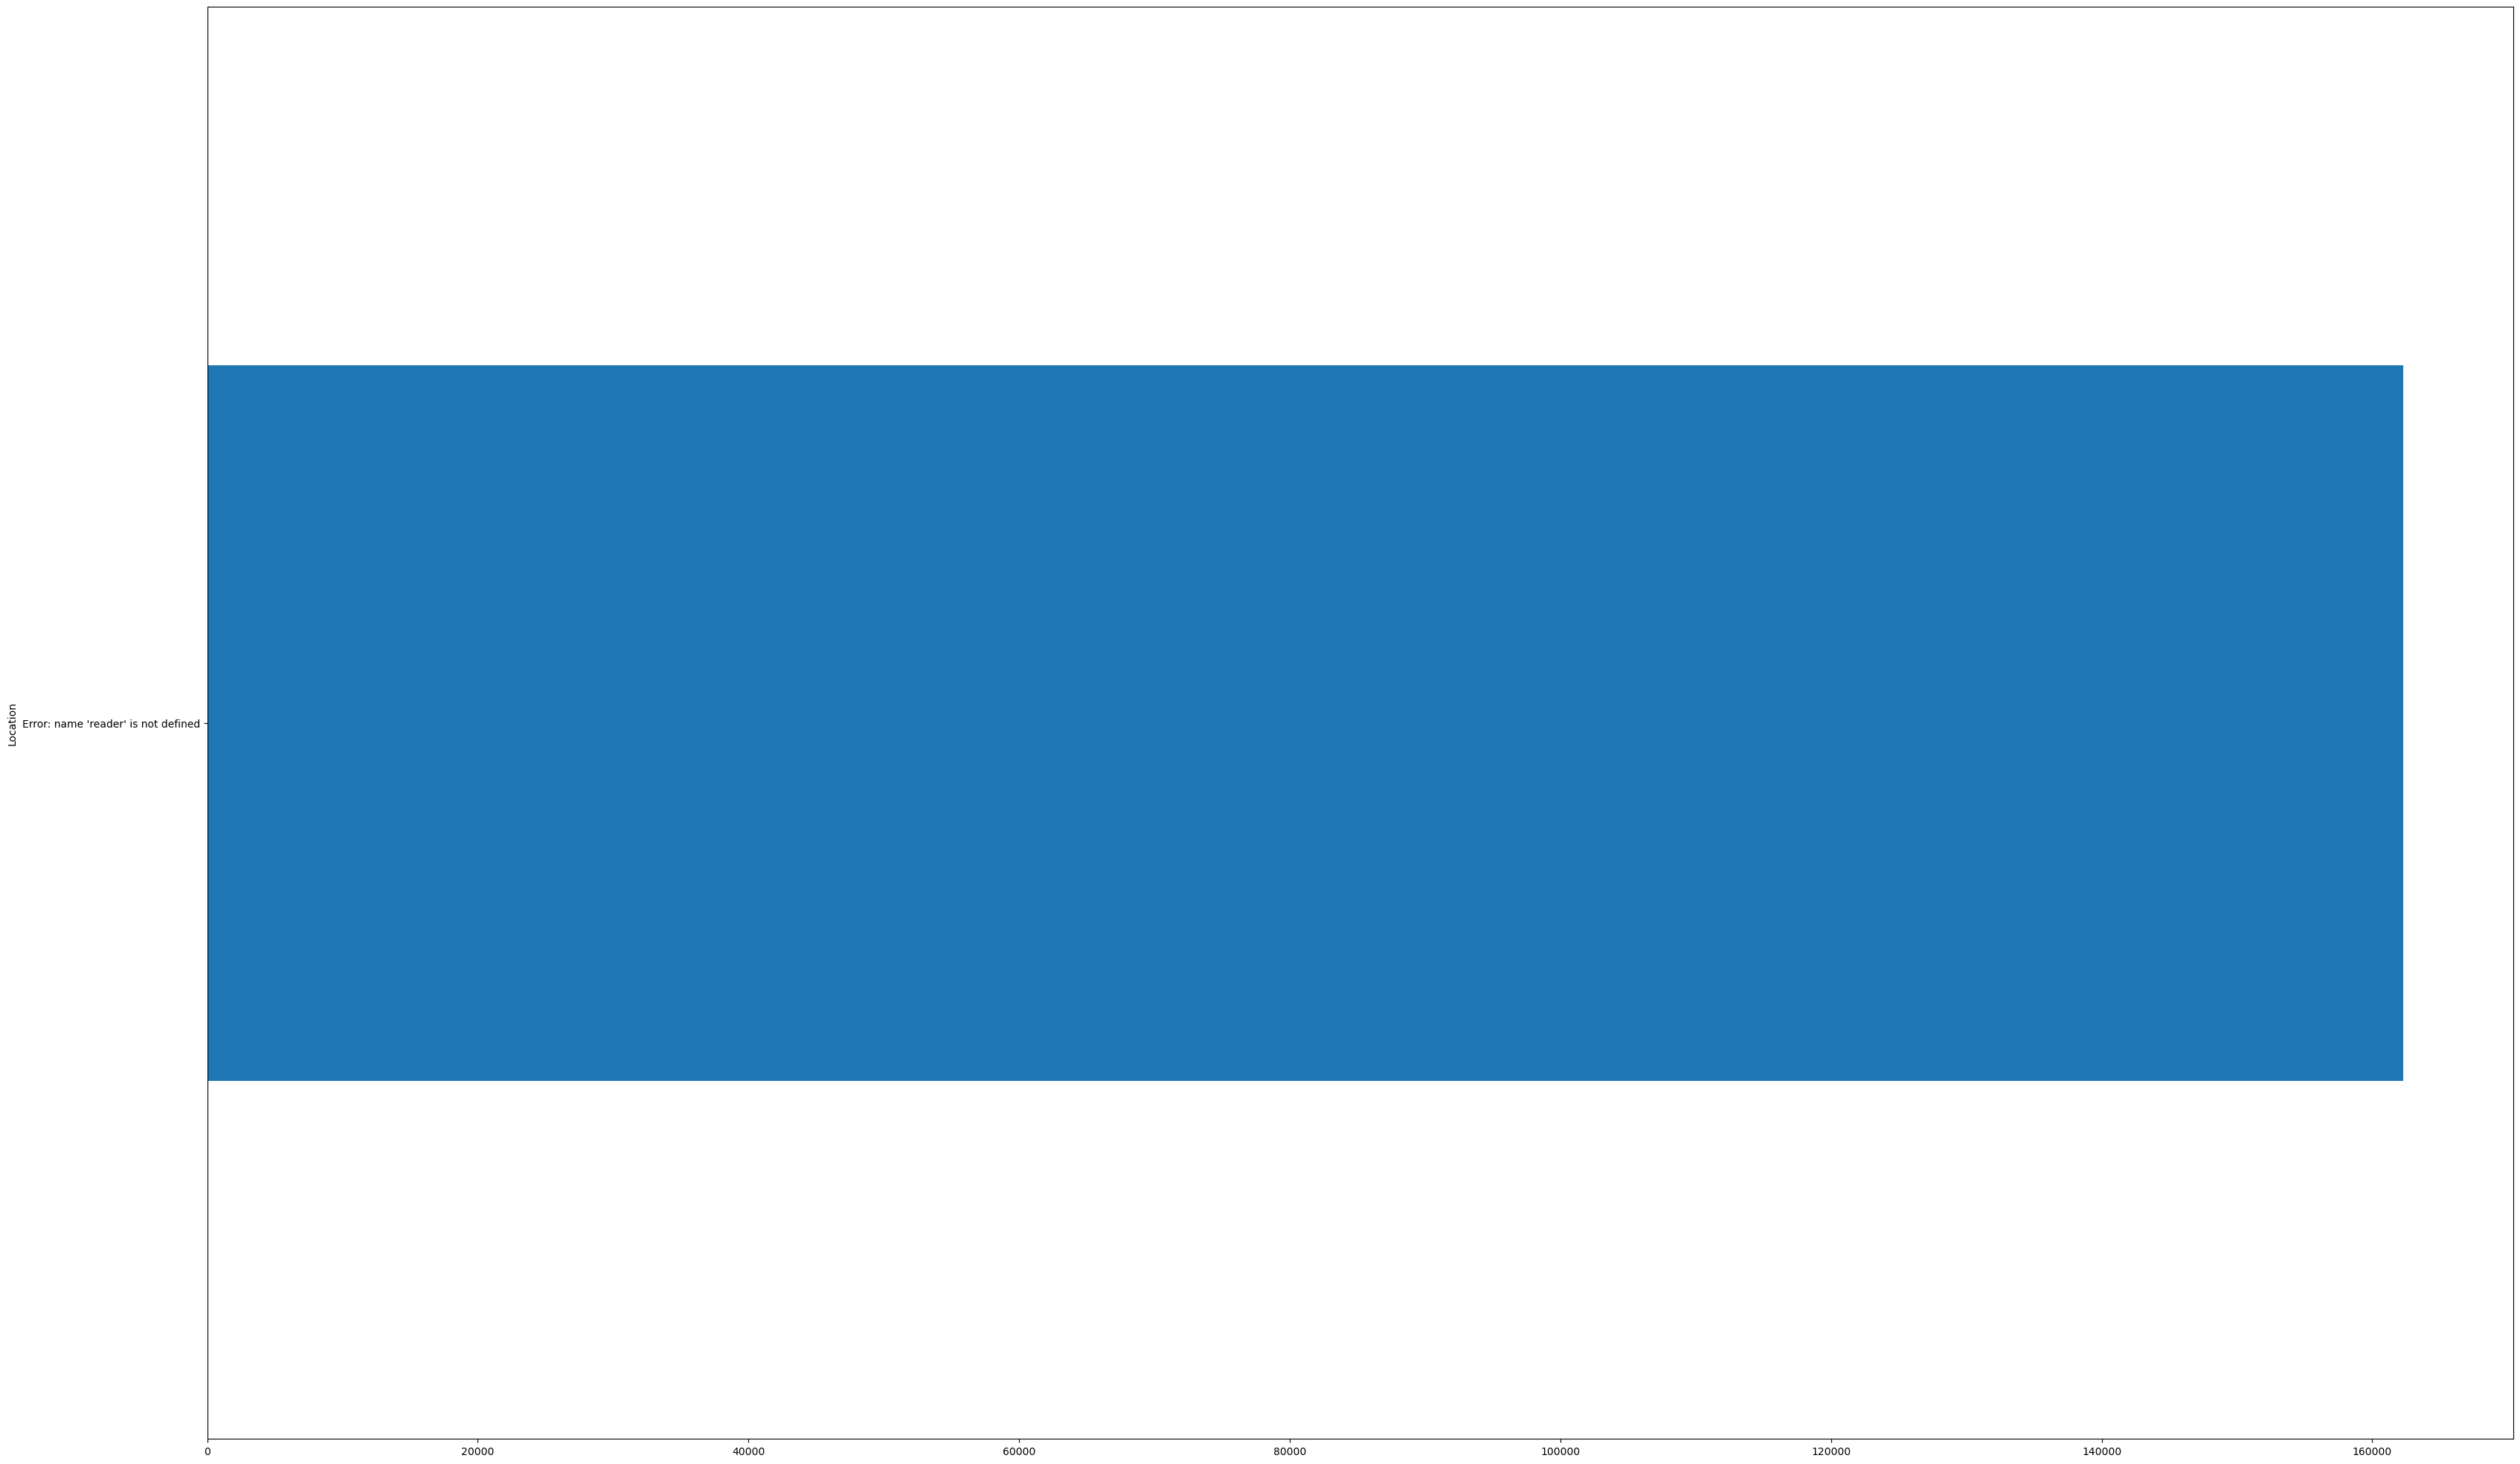

In [5]:
Feb6['Location'].value_counts().plot(kind='barh', figsize=(40,25))

In [ ]:
misc_greater_than_zero_counts = {}
for column in Feb5_Misc.columns:
    # Check if the column is numeric to avoid errors
    if pd.api.types.is_numeric_dtype(Feb5_Misc[column]):
        count = (Feb5_Misc[column] > 0).sum()
        misc_greater_than_zero_counts[column] = count
misc_greater_than_zero_counts

{'Src Port': 1950,
 'Dst Port': 1950,
 'Protocol': 1950,
 'Flow Duration': 1943,
 'Flow Bytes/s': 1856,
 'Flow Packets/s': 1950,
 'Packet Length Min': 1583,
 'Packet Length Max': 1856,
 'Packet Length Mean': 1856,
 'Packet Length Std': 598,
 'Packet Length Variance': 598,
 'Down/Up Ratio': 1373,
 'Average Packet Size': 1856}

In [ ]:
print(Feb5_Misc['Down/Up Ratio'].sort_values())

0        0.0
1619     0.0
1620     0.0
1621     0.0
1622     0.0
        ... 
1596     4.0
1795     4.0
99       4.0
1935     4.0
1841    17.0
Name: Down/Up Ratio, Length: 1950, dtype: float64


In [27]:
zeros = ['Fwd Packet Length Std',
'Bwd IAT Std',
'Fwd PSH Flags',
'Bwd PSH Flags',
'Fwd URG Flags',
'Bwd URG Flags',
'FIN Flag Count',
'SYN Flag Count',
'RST Flag Count',
'PSH Flag Count',
'ACK Flag Count',
'URG Flag Count',
'CWR Flag Count',
'ECE Flag Count',
'Fwd Bytes/Bulk Avg',
'Fwd Packet/Bulk Avg',
'Fwd Bulk Rate Avg',
'Subflow Bwd Packets',
'FWD Init Win Bytes',
'Bwd Init Win Bytes',
'Active Std',
'Fwd Packet Length Std',
 'Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'FIN Flag Count',
 'SYN Flag Count',
 'RST Flag Count',
 'PSH Flag Count',
 'URG Flag Count',
 'CWR Flag Count',
 'ECE Flag Count',
 'Fwd Bytes/Bulk Avg',
 'Fwd Packet/Bulk Avg',
 'Fwd Bulk Rate Avg',
 'Subflow Bwd Packets',
 'Bwd Init Win Bytes',
 'Active Std',
 'Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'URG Flag Count',
 'CWR Flag Count',
 'ECE Flag Count',
 'Fwd Bytes/Bulk Avg',
 'Fwd Packet/Bulk Avg',
 'Fwd Bulk Rate Avg',
 'Subflow Bwd Packets',
 'Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'URG Flag Count',
 'CWR Flag Count',
 'ECE Flag Count',
 'Fwd Bytes/Bulk Avg',
 'Fwd Packet/Bulk Avg',
 'Fwd Bulk Rate Avg',
 'Subflow Bwd Packets',
 'Active Mean',
 'Active Std',
 'Active Max',
 'Active Min']

In [29]:
def duplicates(input_list):
    counts = {}
    for item in input_list:
        if item in counts:
            counts[item] += 1
        else:
            counts[item] = 1
    return {item: count for item, count in counts.items()}
duplicates(zeros)


{'Fwd Packet Length Std': 2,
 'Bwd IAT Std': 1,
 'Fwd PSH Flags': 4,
 'Bwd PSH Flags': 4,
 'Fwd URG Flags': 4,
 'Bwd URG Flags': 4,
 'FIN Flag Count': 2,
 'SYN Flag Count': 2,
 'RST Flag Count': 2,
 'PSH Flag Count': 2,
 'ACK Flag Count': 1,
 'URG Flag Count': 4,
 'CWR Flag Count': 4,
 'ECE Flag Count': 4,
 'Fwd Bytes/Bulk Avg': 4,
 'Fwd Packet/Bulk Avg': 4,
 'Fwd Bulk Rate Avg': 4,
 'Subflow Bwd Packets': 4,
 'FWD Init Win Bytes': 1,
 'Bwd Init Win Bytes': 2,
 'Active Std': 3,
 'Active Mean': 1,
 'Active Max': 1,
 'Active Min': 1}